# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [15]:
!pip install kaggle

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [16]:
!pwd


/root/shared


In [17]:
!pwd

/root/shared


In [21]:
!ls -l  ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 70 Apr 12 17:49 kaggle.json


In [29]:
# !mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [31]:
! kaggle competitions files home-credit-default-risk

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/site-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 655, in competition_list_files_cli
    files = self.competition_list_files(competition)
  File "/usr/local/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 630, in competition_list_files
    return [File(f) for f in competition_list_files_result]
  File "/usr/local/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 630, in <listcomp>
    return [File(f) for f in competition_list_files_result]
  File "/usr/local/lib/python3.9/site-packages/kaggle/models/kaggle_models_extended.py", line 115, in __init__
    parsed_dict = {k: parse(v) for k, v in init_dict.items()}
AttributeError: 'str' object has no attribute 'items'


In [28]:
!ls

1.csv
2.csv
CalculateAverage.ipynb
DATA_DIR
Downloads
HCDR_baseLine_submission_with_numerical_and_cat_features_to_kaggle.ipynb
HW02-KNN-CIFAR10-Boston.ipynb
HW03-Optimization-theory-and-gradient-descent.ipynb
HW04-LinRegrBoston_Bike-Demand.ipynb
HW05-LinRegr_With_Regularization.ipynb
HW06_Part_1_of_2_NaiveBayes_and_MLE_Student_Final.ipynb
HW06_Part_2_of_2_NB_Titanic_project.html
HW06_Part_2_of_2_NB_Titanic_project.ipynb
HW06_Part_2_of_2_NB_Titanic_project.pdf
HW09_Machine_Learning_Pipeline_with_feature_eng.html
HW09_Machine_Learning_Pipeline_with_feature_eng.ipynb
HW10_Perceptrons_Linear SVMs-Student.ipynb
HW_07_LogisticRegression_STUDENT.ipynb
Kaggle-Bike-Sharing-Demand-Challenge
Phase2.md
Quiz: HW07 Notebook and Submission Form.pdf
Quiz: Quiz 6: Query Optimization, SQL Functions & Expressions.pdf
TOCTest.ipynb
Untitled-2.ipynb
Untitled-3.ipynb
X_y.csv
bike2.csv
bike3.csv
bike4.csv
data
datasets
home_credit.png
images
kaggle.json
mid_exam_visunku.ipynb
midterm_practice_exam_student-fa

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




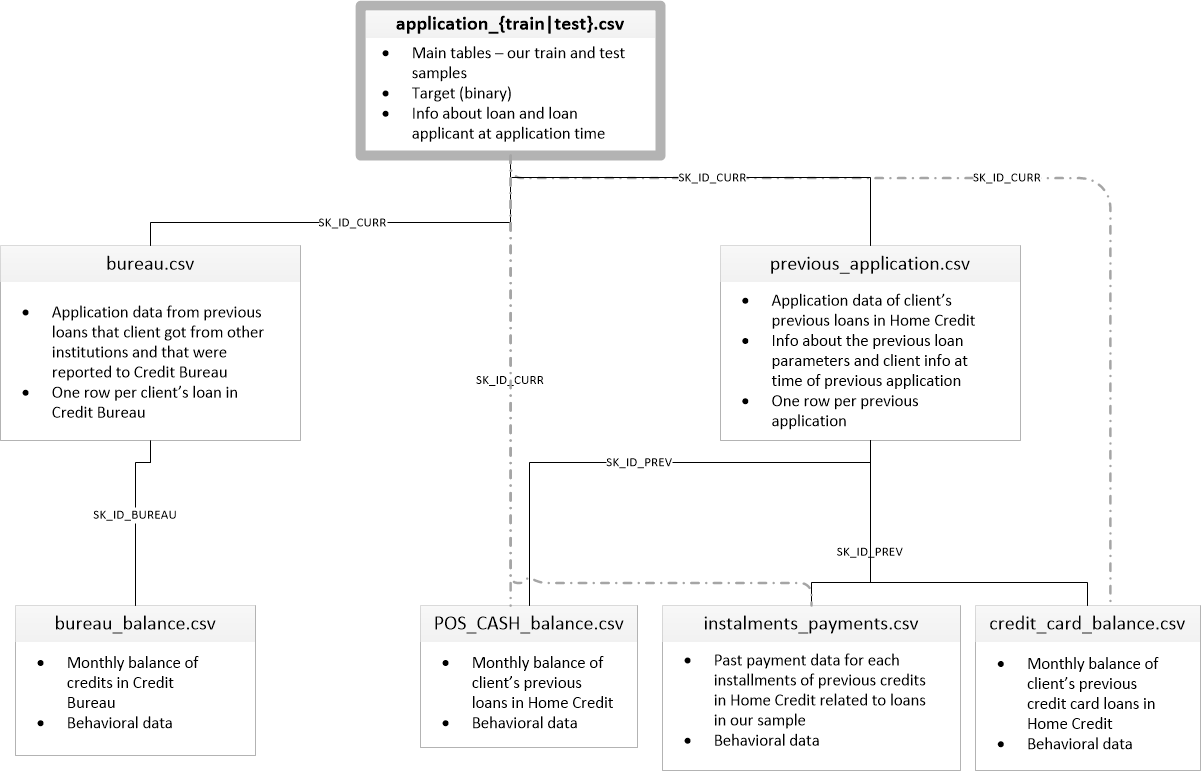

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [7]:
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir DATA_DIR

In [10]:
!ls -l DATA_DIR

total 0


In [11]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [12]:
!pwd 

/root/shared


In [13]:
!ls -l $DATA_DIR

ls: cannot access '../../../Data/home-credit-default-risk': No such file or directory


In [14]:
#!rm -r  DATA_DIR

### Imports

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [31]:
unzippingReq = True #True
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
    # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
    zip_ref.extractall('{DATA_DIR}') 
    zip_ref.close()


## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

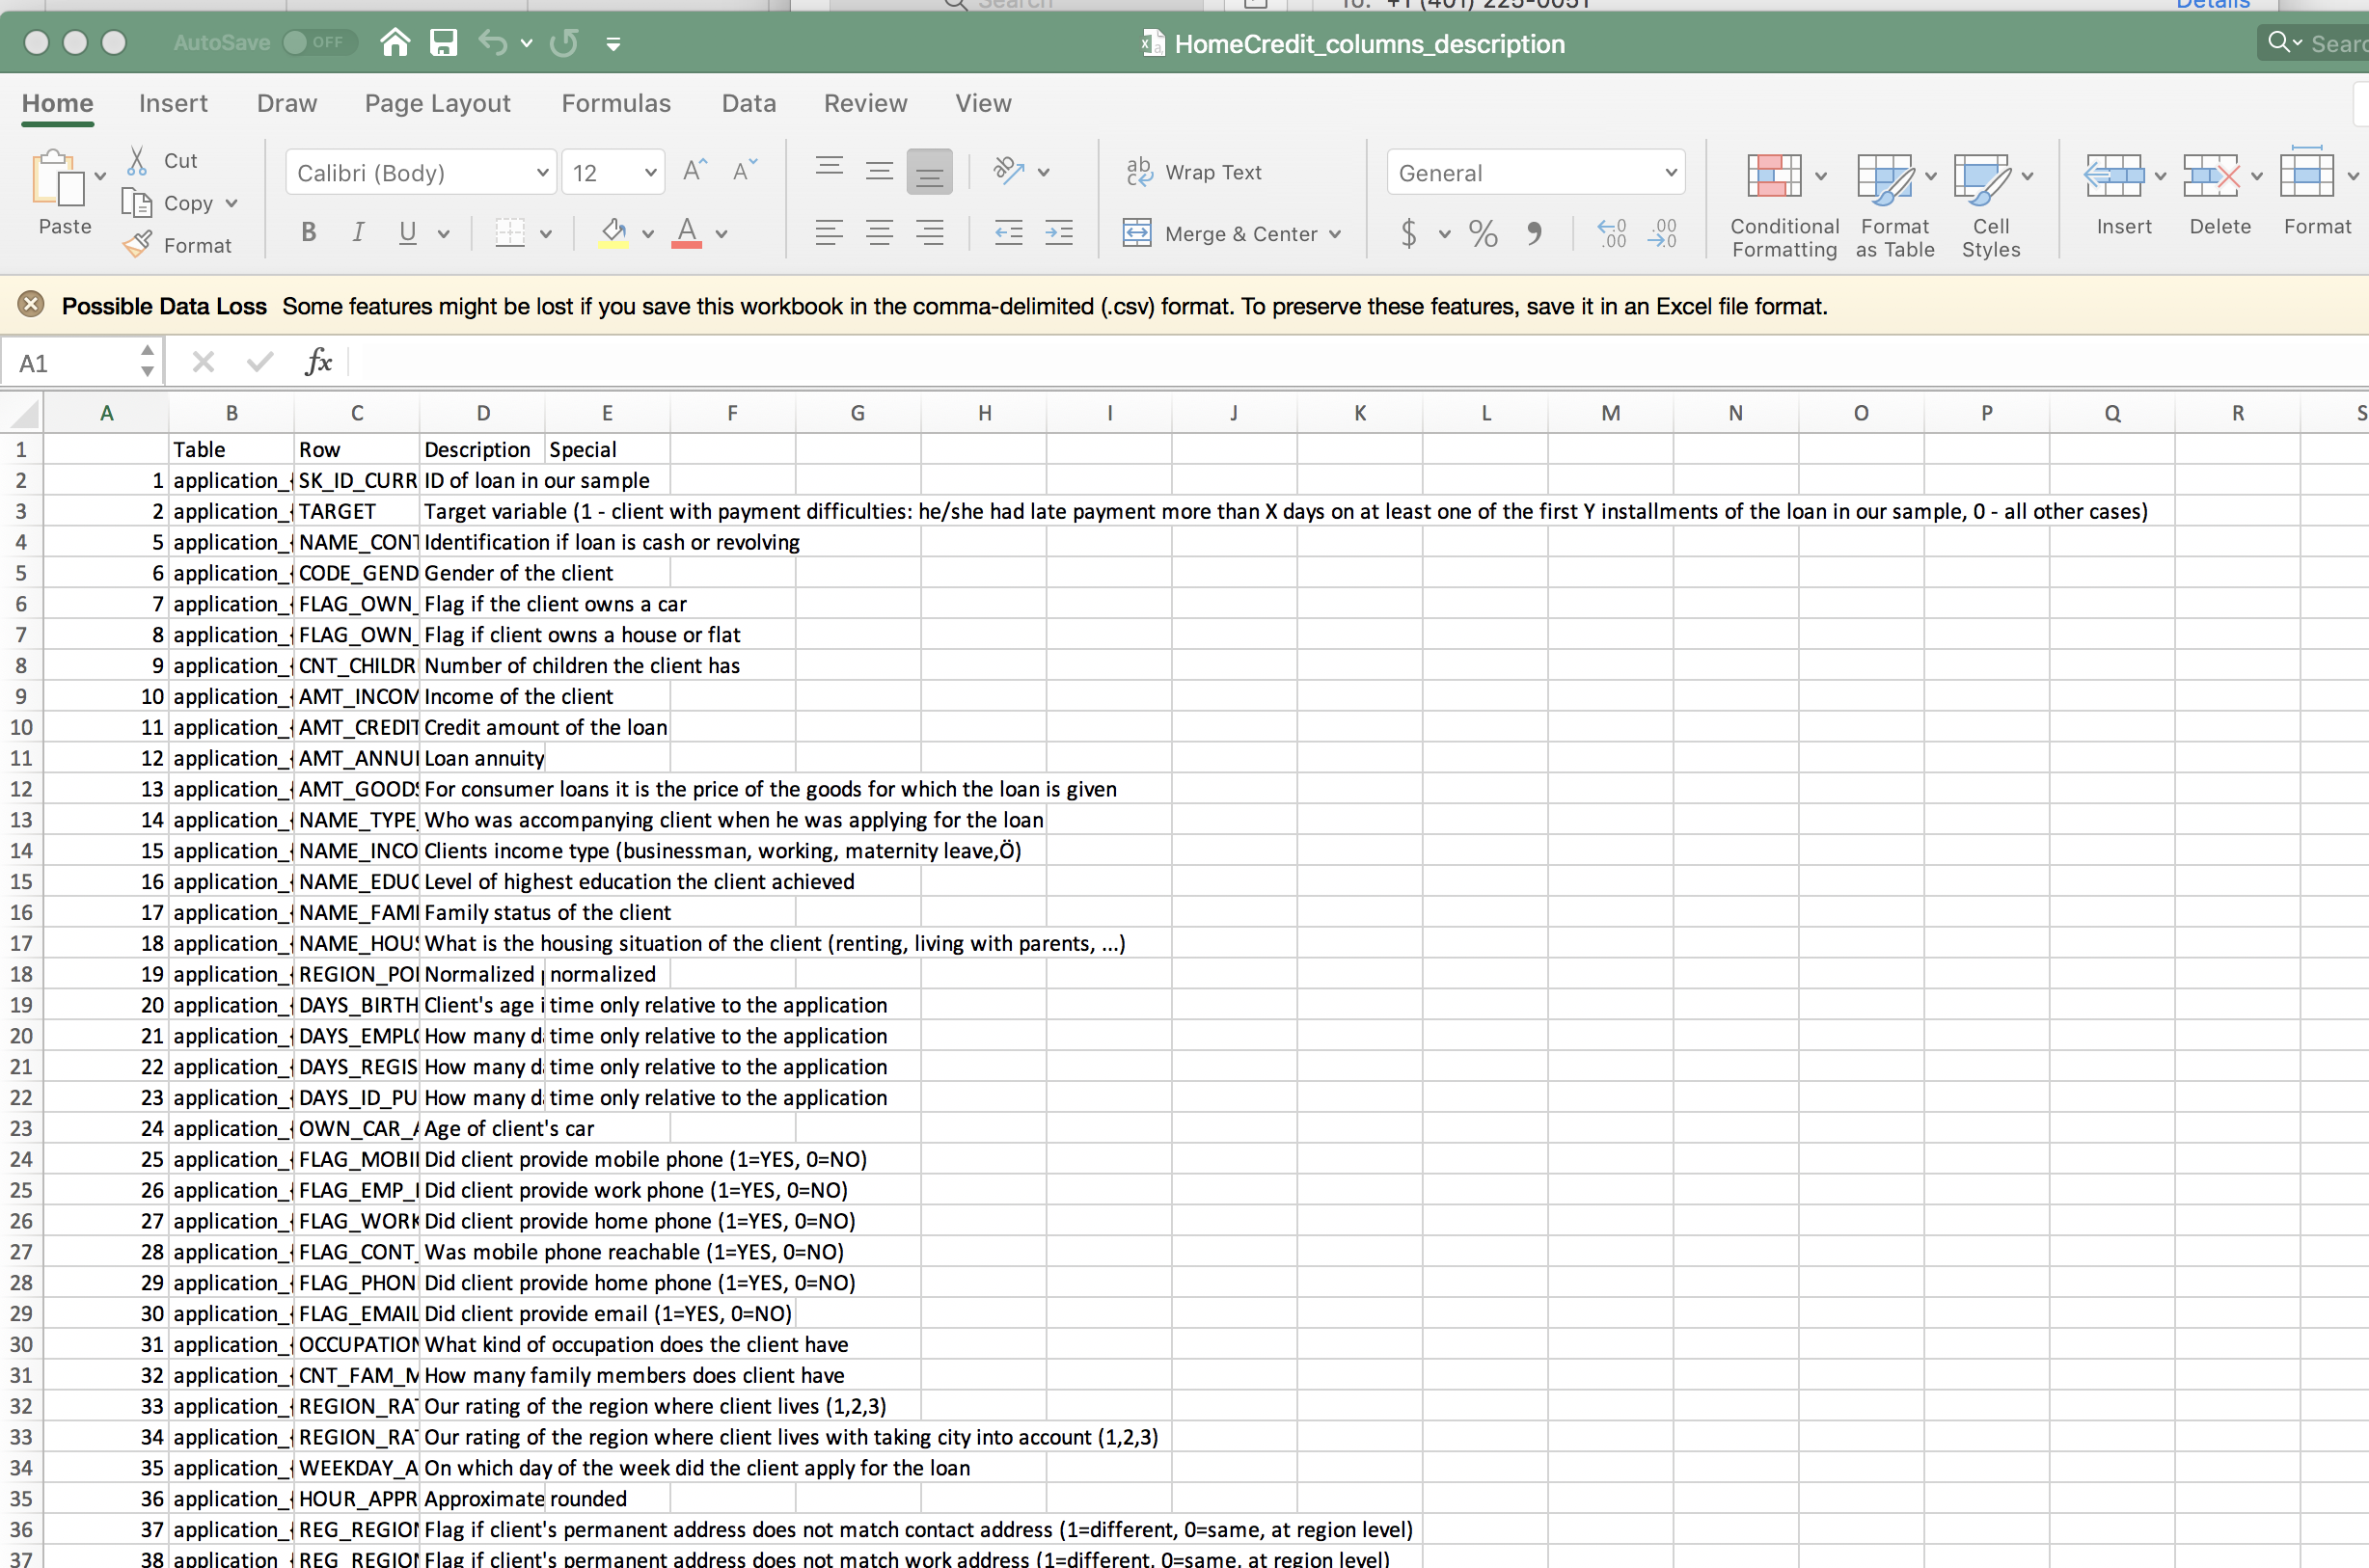

### Application train

In [37]:
ls -l data/home-credit-default-risk/application_train.csv

-rw-r--r-- 1 root root 166133370 Dec 11  2019 Data/home-credit-default-risk/application_train.csv


In [3]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR=f"data/home-credit-default-risk/"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

In [4]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 26.8 s, sys: 3.42 s, total: 30.2 s
Wall time: 30.8 s


In [39]:
DATA_DIR

'data/home-credit-default-risk/'

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [4]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [4]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 24.5 s, sys: 3.08 s, total: 27.6 s
Wall time: 28.3 s


In [6]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application train

In [7]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [45]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [14]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [26]:
numerical_feats = datasets["application_train"].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_feats = datasets["application_train"].select_dtypes(include=['object']).columns.tolist()

print(f"Total features: {datasets['application_train'].shape[1]}")
print(f"Numerical features: {len(numerical_feats)}")
print(f"Categorical features: {len(categorical_feats)}")

print("\nNumerical Features:", numerical_feats)
print("\n\n")
print("Categorical Features:", categorical_feats)

Total features: 122
Numerical features: 106
Categorical features: 16

Numerical Features: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVI

### Missing data for application train

In [7]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

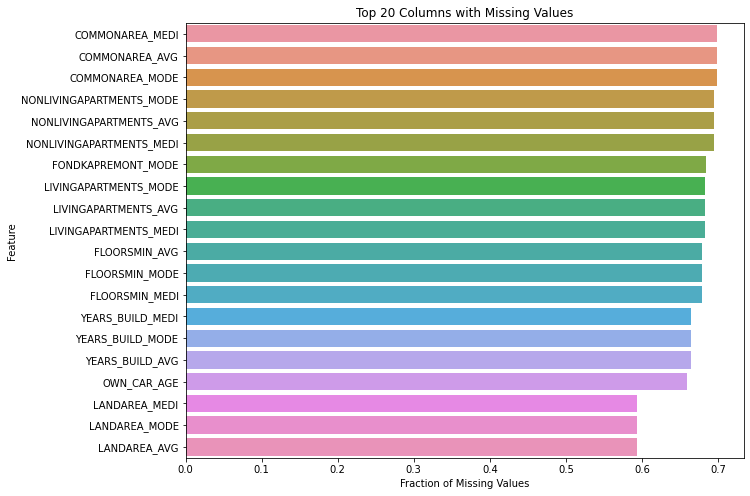

Columns with >50% missing values: 41


In [32]:
missing = datasets["application_train"].isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Show top 20 columns with missing data
plt.figure(figsize=(10, 8))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Feature")
plt.show()

high_missing = missing[missing > 0.5]
print(f"Columns with >50% missing values: {len(high_missing)}")

### Distribution of the target column 

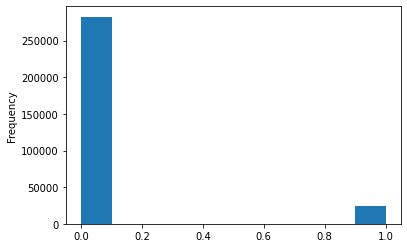

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

datasets["application_train"]['TARGET'].astype(int).plot.hist();

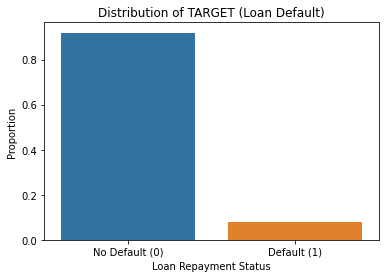

Default rate (%): 8.07


In [25]:
target_counts = datasets["application_train"]['TARGET'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of TARGET (Loan Default)')
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.ylabel('Proportion')
plt.xlabel('Loan Repayment Status')
plt.show()

print("Default rate (%): {:.2f}".format(100 * target_counts[1]))

### Correlation with  the target column 

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


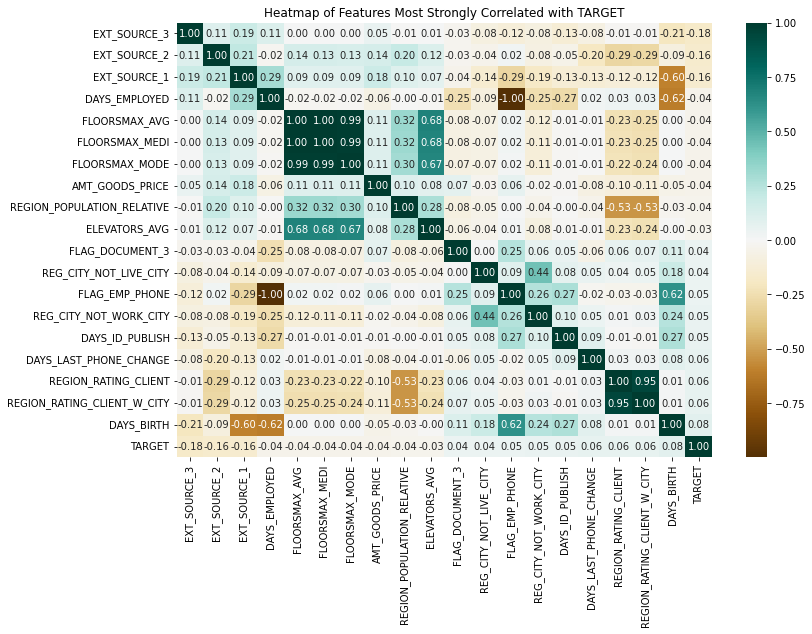

In [42]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

top_positive = correlations.tail(10).index.tolist()
top_negative = correlations.head(10).index.tolist()
top_combined = top_negative + top_positive

# Plot heatmap of these features
plt.figure(figsize=(12, 8))
sns.heatmap(datasets["application_train"][top_combined].corr(), annot=True, fmt=".2f", cmap="BrBG")
plt.title("Heatmap of Features Most Strongly Correlated with TARGET")
plt.show()

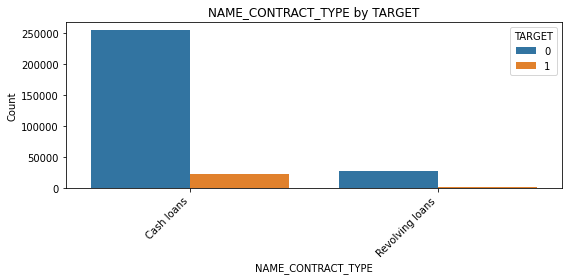

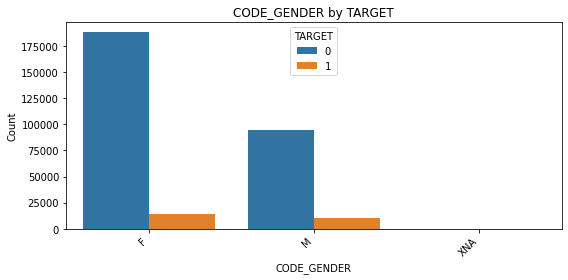

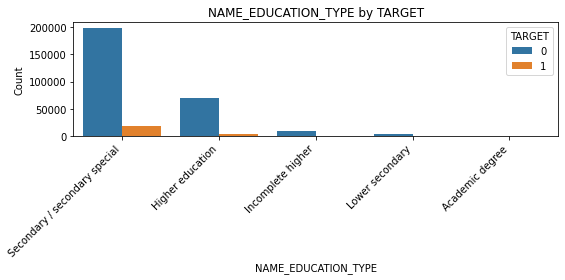

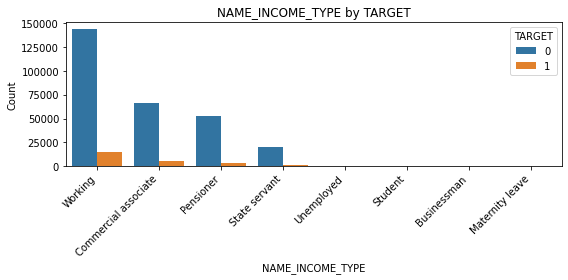

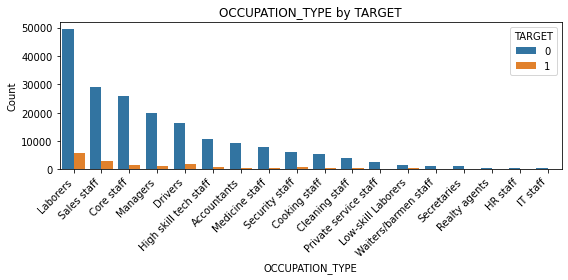

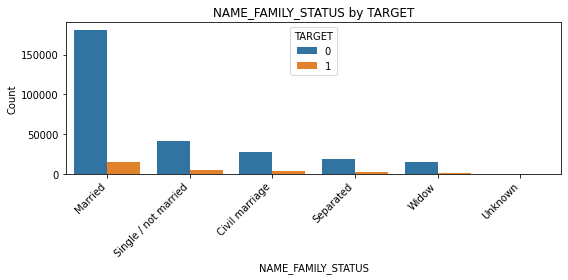

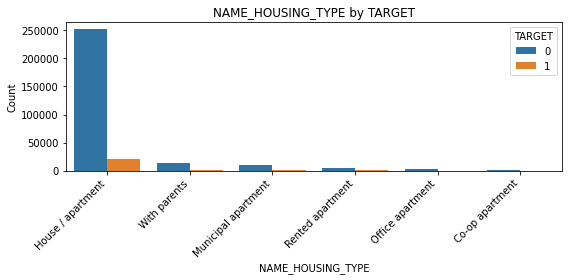

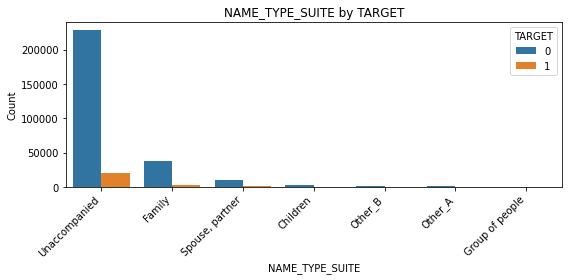

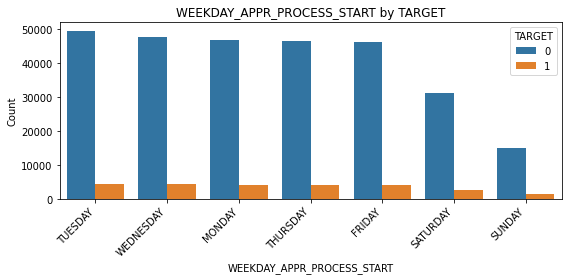

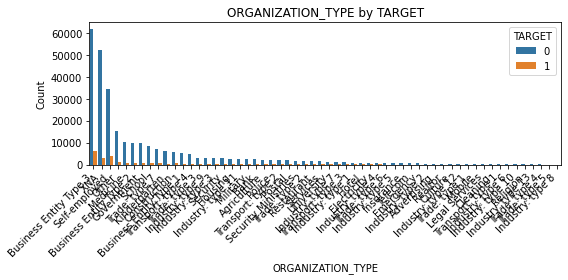

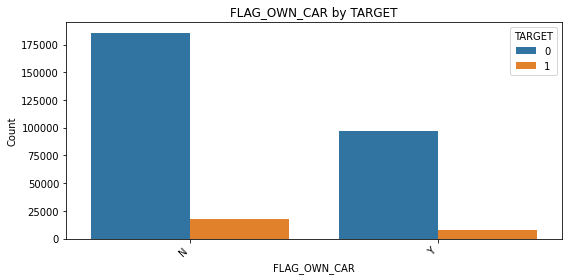

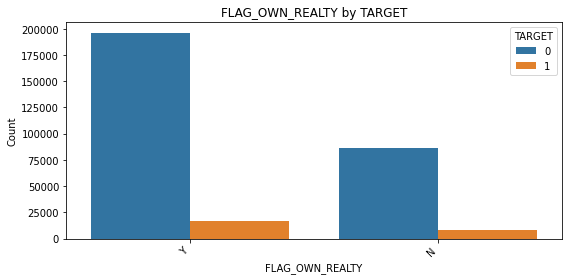

In [42]:
important_categoricals = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
    'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'
]

# Plot
for col in important_categoricals:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=datasets["application_train"], x=col, hue='TARGET', order=datasets["application_train"][col].value_counts().index)
    plt.title(f'{col} by TARGET')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


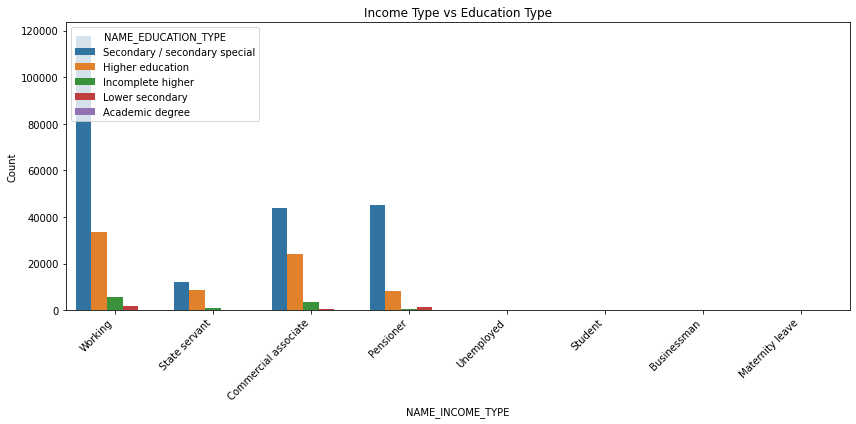

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(data=datasets["application_train"], x='NAME_INCOME_TYPE', hue='NAME_EDUCATION_TYPE')
plt.title("Income Type vs Education Type")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

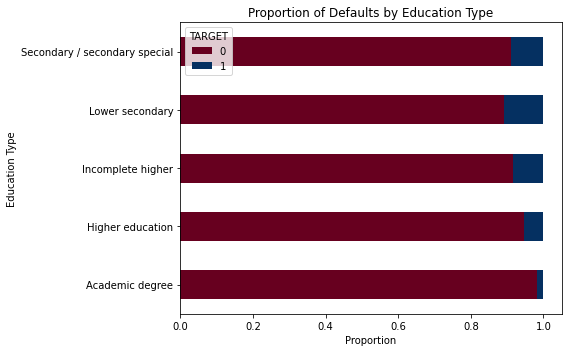

In [46]:
edu_target = pd.crosstab(df['NAME_EDUCATION_TYPE'], df['TARGET'], normalize='index')

edu_target.plot(kind='barh', stacked=True, colormap='RdBu', figsize=(8, 5))
plt.title("Proportion of Defaults by Education Type")
plt.xlabel("Proportion")
plt.ylabel("Education Type")
plt.legend(title="TARGET", loc='best')
plt.tight_layout()
plt.show()

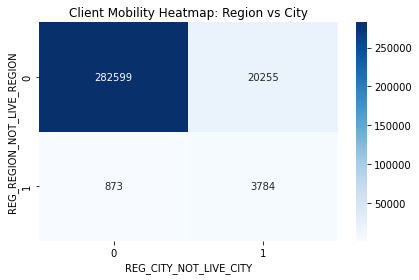

In [48]:
mobility = datasets["application_train"].groupby(
    ['REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY']
).size().reset_index(name='count')

pivot = mobility.pivot(index='REG_REGION_NOT_LIVE_REGION', columns='REG_CITY_NOT_LIVE_CITY', values='count').fillna(0)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt='g')
plt.title("Client Mobility Heatmap: Region vs City")
plt.tight_layout()
plt.show()

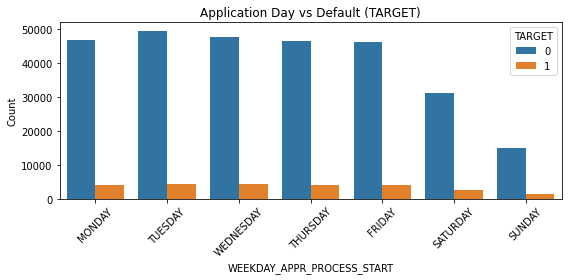

In [49]:
plt.figure(figsize=(8, 4))
sns.countplot(data=datasets["application_train"], x='WEEKDAY_APPR_PROCESS_START', hue='TARGET',
              order=['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'])
plt.title("Application Day vs Default (TARGET)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

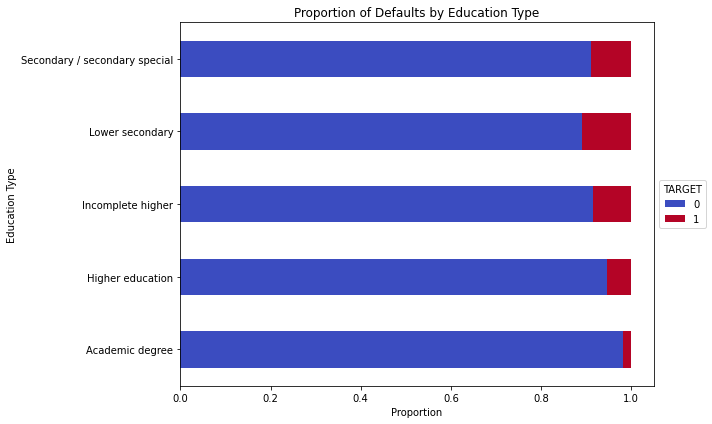

In [52]:
edu_target = pd.crosstab(
    datasets["application_train"]['NAME_EDUCATION_TYPE'],
    datasets["application_train"]['TARGET'],
    normalize='index'
)

edu_target.plot(kind='barh', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title("Proportion of Defaults by Education Type")
plt.xlabel("Proportion")
plt.ylabel("Education Type")
plt.legend(title='TARGET', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

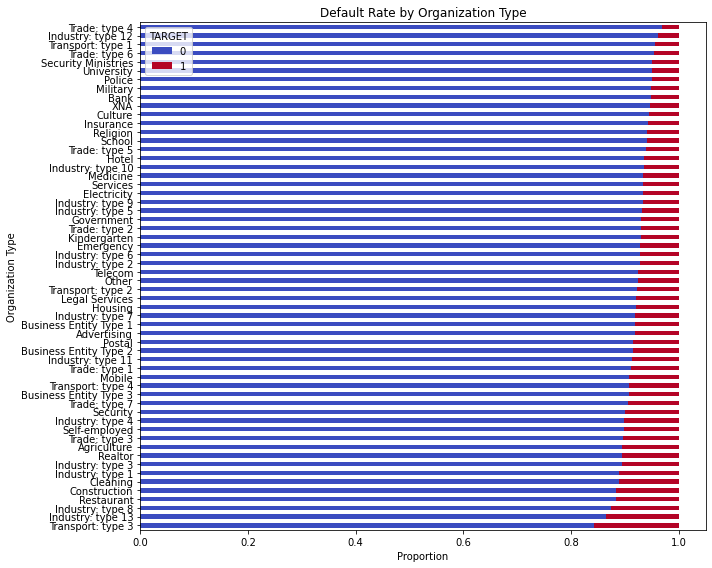

In [51]:
org_target = pd.crosstab(
    datasets["application_train"]['ORGANIZATION_TYPE'],
    datasets["application_train"]['TARGET'],
    normalize='index'
).sort_values(by=1, ascending=False)

org_target.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='coolwarm')
plt.title("Default Rate by Organization Type")
plt.xlabel("Proportion")
plt.ylabel("Organization Type")
plt.legend(title="TARGET")
plt.tight_layout()
plt.show()


### Applicants Age 

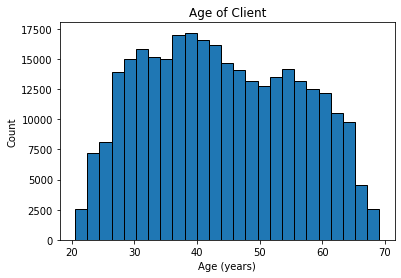

In [38]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

### Applicants occupations

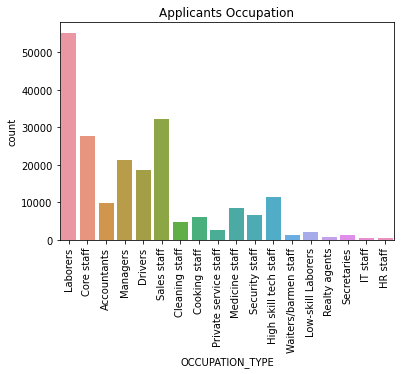

In [6]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

## Summary of Application test

In [27]:
datasets["application_test"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [28]:
datasets["application_test"].describe() #numerical only features

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [29]:
datasets["application_test"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    48744.000000              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count            48744  48744.000000      4.874400e+04  4.874400e+04   
unique               2           NaN               NaN           NaN   
top                  Y           NaN               NaN           NaN   
freq             33658           NaN               NaN           NaN   
mean               NaN      0.397054      1.784318e+05  5.167404e+05   
std                NaN      0.709047      1.015226e+05  3.653970e+05   
min                NaN      0.000000      2.694150e+04  4.500000e+04   
25%                NaN      0.000000      1.125000e+05  2.606400e+05   
50%                NaN      0.000000      1.575000e+05  4.500000e+05   
75%                NaN      1.000000      2.250000e+05  6.750000e+05   
max                NaN     20.000000      4.410000e+06  2.245500e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count    48720.000000     4.874400e+04  ...     48744.000000          48744.0   
unique            NaN              NaN  ...              NaN              NaN   
top               NaN              NaN  ...              NaN              NaN   
freq              NaN              NaN  ...              NaN              NaN   
mean     29426.240209     4.626188e+05  ...         0.001559              0.0   
std      16016.368315     3.367102e+05  ...         0.039456              0.0   
min       2295.000000     4.500000e+04  ...         0.000000              0.0   
25%      17973.000000     2.250000e+05  ...         0.000000              0.0   
50%      26199.000000     3.960000e+05  ...         0.000000              0.0   
75%      37390.500000     6.300000e+05  ...         0.000000              0.0   
max     180576.000000     2.245500e+06  ...         1.000000              0.0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count           48744.0          48744.0               42695.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean                0.0              0.0                   0.002108   
std                 0.0              0.0                   0.046373   
min                 0.0              0.0                   0.000000   
25%                 0.0              0.0                   0.000000   
50%                 0.0              0.0                   0.000000   
75%                 0.0              0.0                   0.000000   
max                 0.0              0.0                   2.000000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                42695.000000                42695.000000   
unique                        NaN                         NaN   
top                           NaN                         NaN   
freq                          NaN                         NaN   
mean                     0.001803                    0.002787   
std                      0.046132                    0.054037   
min                      0.000000   

In [30]:
numerical_feats = datasets["application_test"].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_feats = datasets["application_test"].select_dtypes(include=['object']).columns.tolist()

print(f"Total features: {datasets['application_test'].shape[1]}")
print(f"Numerical features: {len(numerical_feats)}")
print(f"Categorical features: {len(categorical_feats)}")

print("\nNumerical Features:", numerical_feats)
print("\n\n")
print("Categorical Features:", categorical_feats)

Total features: 121
Numerical features: 105
Categorical features: 16

Numerical Features: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG

### Missing data for application test

In [31]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_AVG               66.61               32466
FLOORSMIN_MODE              66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_AVG             65.28               31818
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
LANDAREA_MEDI               57.96               28254
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254

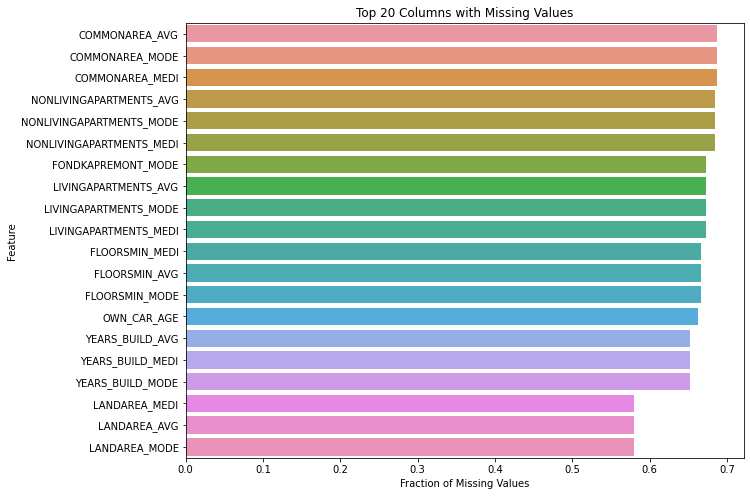

Columns with >50% missing values: 29


In [53]:
missing = datasets["application_test"].isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Show top 20 columns with missing data
plt.figure(figsize=(10, 8))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Feature")
plt.show()

high_missing = missing[missing > 0.5]
print(f"Columns with >50% missing values: {len(high_missing)}")

### Distribution of the target column 


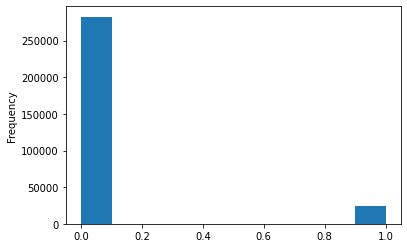

In [35]:
datasets["application_test"]['TARGET'].astype(int).plot.hist();

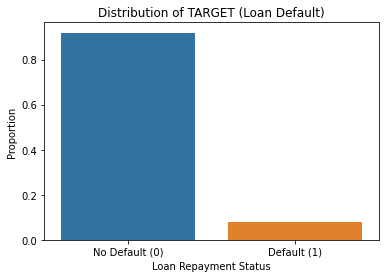

Default rate (%): 8.07


In [36]:
target_counts = datasets["application_test"]['TARGET'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of TARGET (Loan Default)')
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.ylabel('Proportion')
plt.xlabel('Loan Repayment Status')
plt.show()

print("Default rate (%): {:.2f}".format(100 * target_counts[1]))

## Summary of bureau

In [44]:
print(f"bureau shape: {datasets['bureau'].shape}")
datasets['bureau'].head()

bureau shape: (1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [46]:
datasets["bureau"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [47]:
datasets["bureau"].describe() #numerical only features

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [48]:
datasets["bureau"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   1.716428e+06  1.716428e+06       1716428         1716428   
unique           NaN           NaN             4               4   
top              NaN           NaN        Closed      currency 1   
freq             NaN           NaN       1079273         1715020   
mean    2.782149e+05  5.924434e+06           NaN             NaN   
std     1.029386e+05  5.322657e+05           NaN             NaN   
min     1.000010e+05  5.000000e+06           NaN             NaN   
25%     1.888668e+05  5.463954e+06           NaN             NaN   
50%     2.780550e+05  5.926304e+06           NaN             NaN   
75%     3.674260e+05  6.385681e+06           NaN             NaN   
max     4.562550e+05  6.843457e+06           NaN             NaN   

         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
count   1.716428e+06        1.716428e+06         1.610875e+06   
unique           NaN                 NaN                  NaN   
top              NaN                 NaN                  NaN   
freq             NaN                 NaN                  NaN   
mean   -1.142108e+03        8.181666e-01         5.105174e+02   
std     7.951649e+02        3.654443e+01         4.994220e+03   
min    -2.922000e+03        0.000000e+00        -4.206000e+04   
25%    -1.666000e+03        0.000000e+00        -1.138000e+03   
50%    -9.870000e+02        0.000000e+00        -3.300000e+02   
75%    -4.740000e+02        0.000000e+00         4.740000e+02   
max     0.000000e+00        2.792000e+03         3.119900e+04   

        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
count        1.082775e+06            5.919400e+05        1.716428e+06   
unique                NaN                     NaN                 NaN   
top                   NaN                     NaN                 NaN   
freq                  NaN                     NaN                 NaN   
mean        -1.017437e+03            3.825418e+03        6.410406e-03   
std          7.140106e+02            2.060316e+05        9.622391e-02   
min         -4.202300e+04            0.000000e+00        0.000000e+00   
25%         -1.489000e+03            0.000000e+00        0.000000e+00   
50%         -8.970000e+02            0.000000e+00        0.000000e+00   
75%         -4.250000e+02            0.000000e+00        0.000000e+00   
max          0.000000e+00            1.159872e+08        9.000000e+00   

        AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
count     1.716415e+06         1.458759e+06          1.124648e+06   
unique             NaN                  NaN                   NaN   
top                NaN                  NaN                   NaN   
freq               NaN                  NaN                   NaN   
mean      3.549946e+05         1.370851e+05          6.229515e+03   
std       1.149811e+06         6.774011e+05          4.503203e+04   
min       0.000000e+00        -4.705600e+06         -5.864061e+05   
25%       5.130000e+04         0.000000e+00          0.000000e+00   
50%       1.255185e+05         0.000000e+00          0.000000e+00   
75%       3.150000e+05         4.015350e+04          0.000000e+00   
max       5.850000e+08         1.701000e+08          4.705600e+06   

        AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
count             1.716428e+06          1716428        1.716428e+06   
unique                     NaN               15                 NaN   
top                        NaN  Consumer credit                 NaN   
freq                       NaN          1251615                 NaN   
mean              3.791276e+01              NaN       -5.937483e+02   
std               5.937650e+03              NaN        7.207473e+02   
min               0.000000e+00              NaN       -4.194700e+04   
25%               0.000000e+00              NaN       -9.080000e+02   
50%               0.000000e+00              NaN       -3.950000e+02

In [49]:
numerical_feats = datasets["bureau"].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_feats = datasets["bureau"].select_dtypes(include=['object']).columns.tolist()
print(f"Total features: {datasets['bureau'].shape[1]}")
print(f"Numerical features: {len(numerical_feats)}")
print(f"Categorical features: {len(categorical_feats)}")

print("\nNumerical Features:", numerical_feats)
print("\n\n")
print("Categorical Features:", categorical_feats)

Total features: 17
Numerical features: 14
Categorical features: 3

Numerical Features: ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']



Categorical Features: ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


### Missing data for bureau

In [51]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Missing Percent', "Missing Count"])
missing_application_train_data.head(20)

Missing Percent  Missing Count
AMT_ANNUITY                       71.47        1226791
AMT_CREDIT_MAX_OVERDUE            65.51        1124488
DAYS_ENDDATE_FACT                 36.92         633653
AMT_CREDIT_SUM_LIMIT              34.48         591780
AMT_CREDIT_SUM_DEBT               15.01         257669
DAYS_CREDIT_ENDDATE                6.15         105553
AMT_CREDIT_SUM                     0.00             13
CREDIT_ACTIVE                      0.00              0
CREDIT_CURRENCY                    0.00              0
DAYS_CREDIT                        0.00              0
CREDIT_DAY_OVERDUE                 0.00              0
SK_ID_BUREAU                       0.00              0
CNT_CREDIT_PROLONG                 0.00              0
AMT_CREDIT_SUM_OVERDUE             0.00              0
CREDIT_TYPE                        0.00              0
DAYS_CREDIT_UPDATE                 0.00              0
SK_ID_CURR                         0.00              0

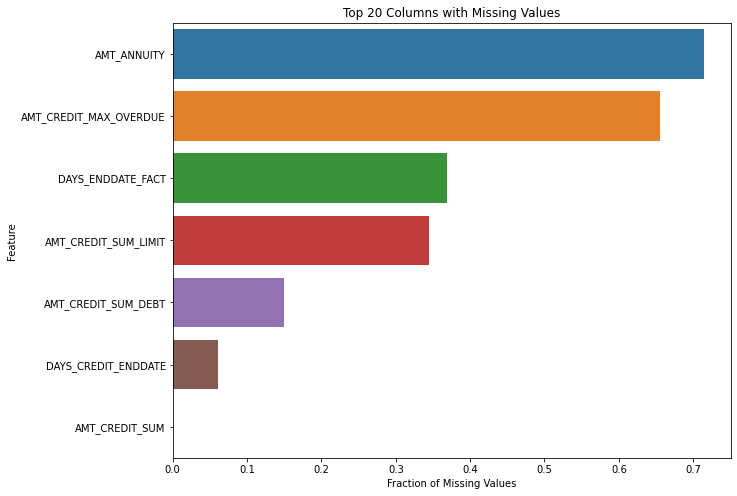

Columns with >50% missing values: 2


In [54]:
missing = datasets["bureau"].isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Show top 20 columns with missing data
plt.figure(figsize=(10, 8))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Feature")
plt.show()

high_missing = missing[missing > 0.5]
print(f"Columns with > 50% missing values: {len(high_missing)}")

## Summary of bureau_balance

In [55]:
datasets["bureau_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [60]:
datasets["bureau_balance"].describe() #numerical only features

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

In [61]:
datasets["bureau_balance"].describe(include='all') 

SK_ID_BUREAU  MONTHS_BALANCE    STATUS
count   2.729992e+07    2.729992e+07  27299925
unique           NaN             NaN         8
top              NaN             NaN         C
freq             NaN             NaN  13646993
mean    6.036297e+06   -3.074169e+01       NaN
std     4.923489e+05    2.386451e+01       NaN
min     5.001709e+06   -9.600000e+01       NaN
25%     5.730933e+06   -4.600000e+01       NaN
50%     6.070821e+06   -2.500000e+01       NaN
75%     6.431951e+06   -1.100000e+01       NaN
max     6.842888e+06    0.000000e+00       NaN

### Missing data for bureau_balance

In [62]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Missing Percent', "Missing Count"])
missing_application_train_data.head(20)

Missing Percent  Missing Count
SK_ID_BUREAU                0.0              0
MONTHS_BALANCE              0.0              0
STATUS                      0.0              0

In [67]:
missing = datasets["bureau_balance"].isnull().mean().sort_values(ascending=False)

missing = missing[missing > 0]

if not missing.empty:
    plt.figure(figsize=(10, 8))
    sns.barplot(x=missing.values[:20], y=missing.index[:20])
    plt.title("Top 20 Columns with Missing Values in bureau_balance")
    plt.xlabel("Fraction of Missing Values")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    high_missing = missing[missing > 0.5]
    print(f"Columns with > 50% missing values: {len(high_missing)}")
else:
    print("✅ No missing values found in bureau_balance.")


✅ No missing values found in bureau_balance.


## Bureau and bureau_balance combained

In [4]:
bureau = datasets["bureau"]
bureau_balance = datasets["bureau_balance"]

bb_status_dummies = pd.get_dummies(bureau_balance['STATUS'], prefix='STATUS')

# Concatenate with bureau_balance
bureau_balance_dummies = pd.concat([bureau_balance[['SK_ID_BUREAU', 'MONTHS_BALANCE']], bb_status_dummies], axis=1)

# Group and aggregate efficiently
bb_agg = bureau_balance_dummies.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['min', 'max', 'count'],
    'STATUS_0': 'mean',
    'STATUS_1': 'mean',
    'STATUS_2': 'mean',
    'STATUS_3': 'mean',
    'STATUS_4': 'mean',
    'STATUS_5': 'mean',
    'STATUS_C': 'mean',
    'STATUS_X': 'mean'
})

# Flatten multi-index columns
bb_agg.columns = ['MONTHS_BALANCE_MIN', 'MONTHS_BALANCE_MAX', 'MONTHS_BALANCE_SIZE',
                  'STATUS_0', 'STATUS_1', 'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X']

# Reset index
bb_agg = bb_agg.reset_index()
bureau_full = bureau.merge(bb_agg, how='left', on='SK_ID_BUREAU')

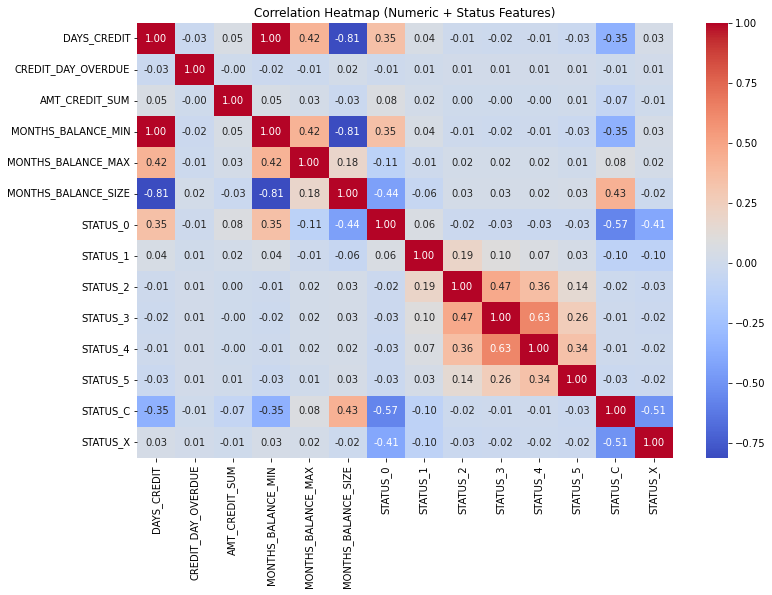

In [6]:
eda_columns = [
    'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM',
    'CREDIT_ACTIVE', 'CREDIT_TYPE',
    'MONTHS_BALANCE_MIN', 'MONTHS_BALANCE_MAX', 'MONTHS_BALANCE_SIZE',
    'STATUS_0', 'STATUS_1', 'STATUS_2', 'STATUS_3', 'STATUS_4',
    'STATUS_5', 'STATUS_C', 'STATUS_X'
]

bureau_eda = bureau_full[eda_columns].copy()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(bureau_eda.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric + Status Features)")
plt.show()

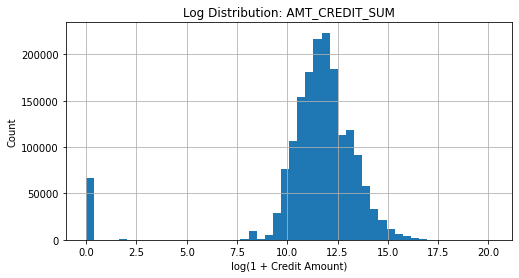

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# AMT_CREDIT_SUM (log)
plt.figure(figsize=(8,4))
np.log1p(bureau_eda['AMT_CREDIT_SUM']).hist(bins=50)
plt.title("Log Distribution: AMT_CREDIT_SUM")
plt.xlabel("log(1 + Credit Amount)")
plt.ylabel("Count")
plt.show()


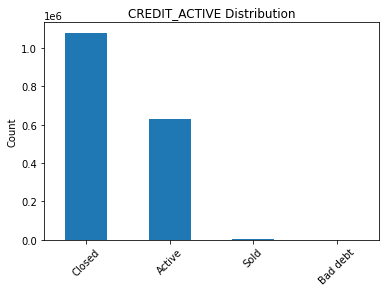

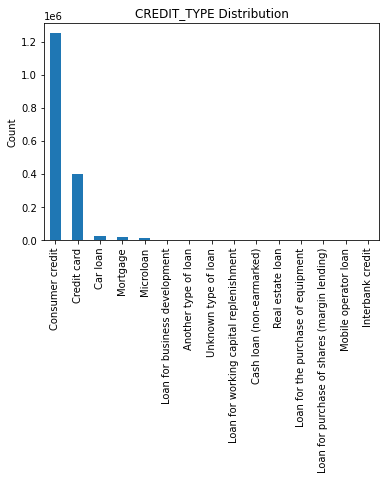

In [8]:
# CREDIT_ACTIVE
bureau_eda['CREDIT_ACTIVE'].value_counts().plot(kind='bar')
plt.title("CREDIT_ACTIVE Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# CREDIT_TYPE
bureau_eda['CREDIT_TYPE'].value_counts().plot(kind='bar')
plt.title("CREDIT_TYPE Distribution")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Summary of previous_application

In [11]:
datasets["previous_application"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
datasets["previous_application"].describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [13]:
datasets["previous_application"].describe(include='all')

SK_ID_PREV    SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  \
count   1.670214e+06  1.670214e+06            1670214  1.297979e+06   
unique           NaN           NaN                  4           NaN   
top              NaN           NaN         Cash loans           NaN   
freq             NaN           NaN             747553           NaN   
mean    1.923089e+06  2.783572e+05                NaN  1.595512e+04   
std     5.325980e+05  1.028148e+05                NaN  1.478214e+04   
min     1.000001e+06  1.000010e+05                NaN  0.000000e+00   
25%     1.461857e+06  1.893290e+05                NaN  6.321780e+03   
50%     1.923110e+06  2.787145e+05                NaN  1.125000e+04   
75%     2.384280e+06  3.675140e+05                NaN  2.065842e+04   
max     2.845382e+06  4.562550e+05                NaN  4.180581e+05   

        AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count      1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06   
unique              NaN           NaN               NaN              NaN   
top                 NaN           NaN               NaN              NaN   
freq                NaN           NaN               NaN              NaN   
mean       1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05   
std        2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05   
min        0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00   
25%        1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04   
50%        7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05   
75%        1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05   
max        6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
count                     1670214             1.670214e+06  ...   
unique                          7                      NaN  ...   
top                       TUESDAY                      NaN  ...   
freq                       255118                      NaN  ...   
mean                          NaN             1.248418e+01  ...   
std                           NaN             3.334028e+00  ...   
min                           NaN             0.000000e+00  ...   
25%                           NaN             1.000000e+01  ...   
50%                           NaN             1.200000e+01  ...   
75%                           NaN             1.500000e+01  ...   
max                           NaN             2.300000e+01  ...   

       NAME_SELLER_INDUSTRY   CNT_PAYMENT  NAME_YIELD_GROUP  \
count               1670214  1.297984e+06           1670214   
unique                   11           NaN                 5   
top                     XNA           NaN               XNA   
freq                 855720           NaN            517215   
mean                    NaN  1.605408e+01               NaN   
std                     NaN  1.456729e+01               NaN   
min                     NaN  0.000000e+00               NaN   
25%                     NaN  6.000000e+00               NaN   
50%                     NaN  1.200000e+01               NaN   
75%                     NaN  2.400000e+01               NaN   
max                     NaN  8.400000e+01               NaN   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
count               1669868       997149.000000  997149.000000   
unique                   17                 NaN            NaN   
top                    Cash                 NaN            NaN   
freq                 285990                 NaN            NaN   
mean                    NaN       342209.855039   13826.269337   
std                     NaN        88916.115833   72444.869708   
min                     NaN        -2922.000000   -2892.000000   
25%                     NaN       365243.000000   -1628.000000   
50%                     NaN       365243.000000    -831.000000   
75%                   

                           SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.000321     0.011459   
SK_ID_CURR                  -0.000321    1.000000     0.000577   
AMT_ANNUITY                  0.011459    0.000577     1.000000   
AMT_APPLICATION              0.003302    0.000280     0.808872   
AMT_CREDIT                   0.003659    0.000195     0.816429   
AMT_DOWN_PAYMENT            -0.001313   -0.000063     0.267694   
AMT_GOODS_PRICE              0.015293    0.000369     0.820895   
HOUR_APPR_PROCESS_START     -0.002652    0.002842    -0.036201   
NFLAG_LAST_APPL_IN_DAY      -0.002828    0.000098     0.020639   
RATE_DOWN_PAYMENT           -0.004051    0.001158    -0.103878   
RATE_INTEREST_PRIMARY        0.012969    0.033197     0.141823   
RATE_INTEREST_PRIVILEGED    -0.022312   -0.016757    -0.202335   
DAYS_DECISION                0.019100   -0.000637     0.279051   
SELLERPLACE_AREA            -0.001079    0.001265    -0.015027   
CNT_PAYMEN

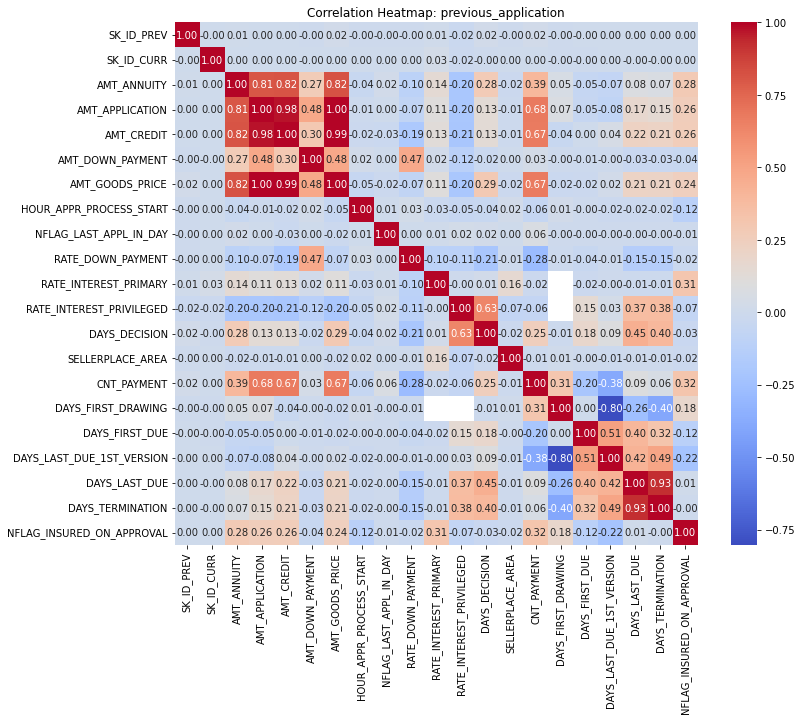

In [17]:
correlations = datasets["previous_application"].corr()

# Print correlations
print(correlations)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap: previous_application")
plt.tight_layout()
plt.show()

In [18]:
percent = (datasets["previous_application"].isnull().sum()/datasets["previous_application"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["previous_application"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Missing Percent', "Missing Count"])
missing_application_train_data.head(20)

Missing Percent  Missing Count
RATE_INTEREST_PRIVILEGED             99.64        1664263
RATE_INTEREST_PRIMARY                99.64        1664263
AMT_DOWN_PAYMENT                     53.64         895844
RATE_DOWN_PAYMENT                    53.64         895844
NAME_TYPE_SUITE                      49.12         820405
NFLAG_INSURED_ON_APPROVAL            40.30         673065
DAYS_TERMINATION                     40.30         673065
DAYS_LAST_DUE                        40.30         673065
DAYS_LAST_DUE_1ST_VERSION            40.30         673065
DAYS_FIRST_DUE                       40.30         673065
DAYS_FIRST_DRAWING                   40.30         673065
AMT_GOODS_PRICE                      23.08         385515
AMT_ANNUITY                          22.29         372235
CNT_PAYMENT                          22.29         372230
PRODUCT_COMBINATION                   0.02            346
AMT_CREDIT                            0.00              1
NAME_YIELD_GROUP                      0.00              0
NAME_PORTFOLIO                        0.00              0
NAME_SELLER_INDUSTRY                  0.00              0
SELLERPLACE_AREA                      0.00              0

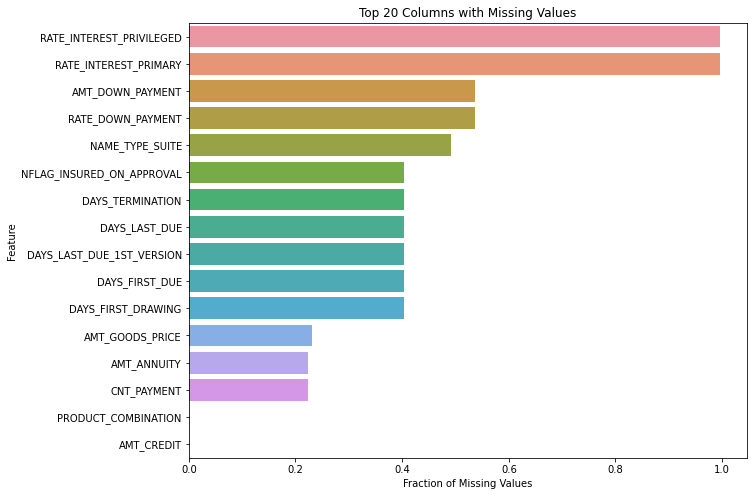

Columns with > 50% missing values: 4


In [19]:
missing = datasets["previous_application"].isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Show top 20 columns with missing data
plt.figure(figsize=(10, 8))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Feature")
plt.show()

high_missing = missing[missing > 0.5]
print(f"Columns with > 50% missing values: {len(high_missing)}")

## Summary of POS_CASH_balance.csv

In [24]:
datasets["POS_CASH_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [25]:
datasets["POS_CASH_balance"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count   1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
unique           NaN           NaN             NaN             NaN   
top              NaN           NaN             NaN             NaN   
freq             NaN           NaN             NaN             NaN   
mean    1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std     5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min     1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%     1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%     1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%     2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max     2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

        CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS        SK_DPD    SK_DPD_DEF  
count            9.975271e+06             10001358  1.000136e+07  1.000136e+07  
unique                    NaN                    9           NaN           NaN  
top                       NaN               Active           NaN           NaN  
freq                      NaN              9151119           NaN           NaN  
mean             1.048384e+01                  NaN  1.160693e+01  6.544684e-01  
std              1.110906e+01                  NaN  1.327140e+02  3.276249e+01  
min              0.000000e+00                  NaN  0.000000e+00  0.000000e+00  
25%              3.000000e+00                  NaN  0.000000e+00  0.000000e+00  
50%              7.000000e+00                  NaN  0.000000e+00  0.000000e+00  
75%              1.400000e+01                  NaN  0.000000e+00  0.000000e+00  
max              8.500000e+01                  NaN  4.231000e+03  3.595000e+03

                       SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
SK_ID_PREV               1.000000   -0.000336        0.001835        0.003820   
SK_ID_CURR              -0.000336    1.000000        0.000404        0.000144   
MONTHS_BALANCE           0.001835    0.000404        1.000000        0.336163   
CNT_INSTALMENT           0.003820    0.000144        0.336163        1.000000   
CNT_INSTALMENT_FUTURE    0.003679   -0.000559        0.271595        0.871276   
SK_DPD                  -0.000487    0.003118       -0.018939       -0.060803   
SK_DPD_DEF               0.004848    0.001948       -0.000381       -0.014154   

                       CNT_INSTALMENT_FUTURE    SK_DPD  SK_DPD_DEF  
SK_ID_PREV                          0.003679 -0.000487    0.004848  
SK_ID_CURR                         -0.000559  0.003118    0.001948  
MONTHS_BALANCE                      0.271595 -0.018939   -0.000381  
CNT_INSTALMENT                      0.871276 -0.060803   -0.014154  
CNT_IN

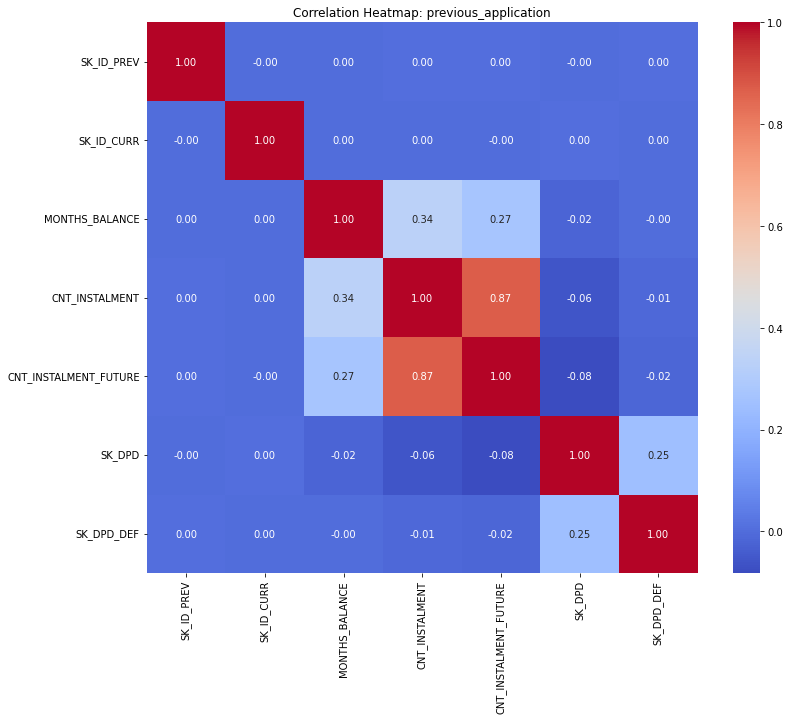

In [26]:
correlations = datasets["POS_CASH_balance"].corr()

# Print correlations
print(correlations)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap: previous_application")
plt.tight_layout()
plt.show()

In [27]:
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Missing Percent', "Missing Count"])
missing_application_train_data.head(20)

Missing Percent  Missing Count
CNT_INSTALMENT_FUTURE             0.26          26087
CNT_INSTALMENT                    0.26          26071
SK_ID_PREV                        0.00              0
SK_ID_CURR                        0.00              0
MONTHS_BALANCE                    0.00              0
NAME_CONTRACT_STATUS              0.00              0
SK_DPD                            0.00              0
SK_DPD_DEF                        0.00              0

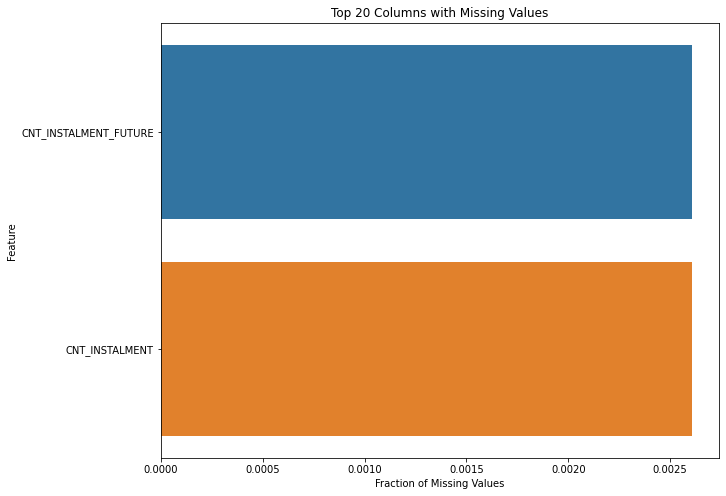

Columns with > 20% missing values: 0


In [29]:
missing = datasets["POS_CASH_balance"].isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Show top 20 columns with missing data
plt.figure(figsize=(10, 8))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Feature")
plt.show()

high_missing = missing[missing > 0.2]
print(f"Columns with > 20% missing values: {len(high_missing)}")

## Summary of installments_payments.csv

In [32]:
datasets["installments_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [33]:
datasets["installments_payments"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

                        SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
SK_ID_PREV                1.000000    0.002132                0.000685   
SK_ID_CURR                0.002132    1.000000                0.000480   
NUM_INSTALMENT_VERSION    0.000685    0.000480                1.000000   
NUM_INSTALMENT_NUMBER    -0.002095   -0.000548               -0.323414   
DAYS_INSTALMENT           0.003748    0.001191                0.130244   
DAYS_ENTRY_PAYMENT        0.003734    0.001215                0.128124   
AMT_INSTALMENT            0.002042   -0.000226                0.168109   
AMT_PAYMENT               0.001887   -0.000124                0.177176   

                        NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
SK_ID_PREV                          -0.002095         0.003748   
SK_ID_CURR                          -0.000548         0.001191   
NUM_INSTALMENT_VERSION              -0.323414         0.130244   
NUM_INSTALMENT_NUMBER                1.000000         0.090286   
DAY

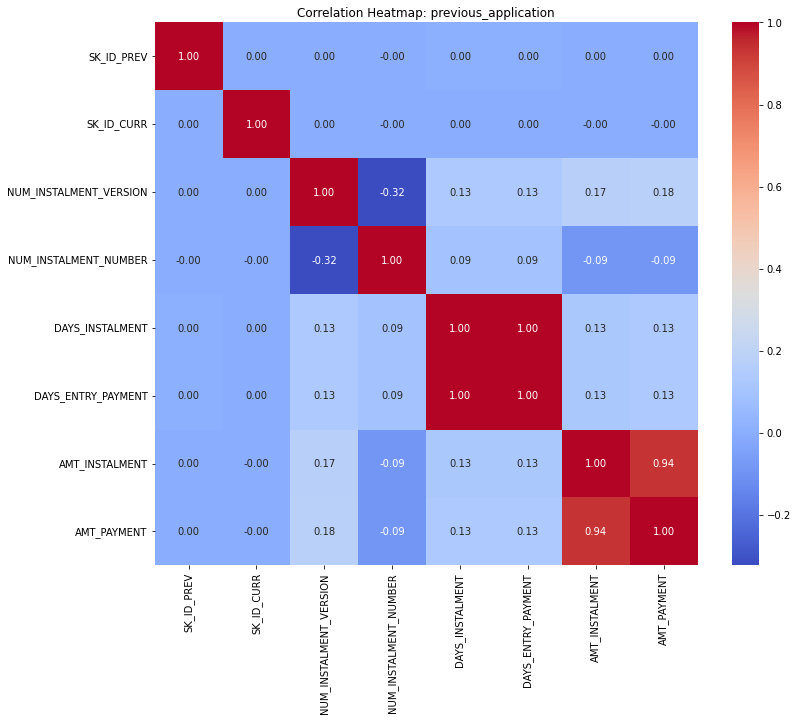

In [34]:
correlations = datasets["installments_payments"].corr()

# Print correlations
print(correlations)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap: previous_application")
plt.tight_layout()
plt.show()

In [35]:
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Missing Percent', "Missing Count"])
missing_application_train_data.head(20)

Missing Percent  Missing Count
DAYS_ENTRY_PAYMENT                 0.02           2905
AMT_PAYMENT                        0.02           2905
SK_ID_PREV                         0.00              0
SK_ID_CURR                         0.00              0
NUM_INSTALMENT_VERSION             0.00              0
NUM_INSTALMENT_NUMBER              0.00              0
DAYS_INSTALMENT                    0.00              0
AMT_INSTALMENT                     0.00              0

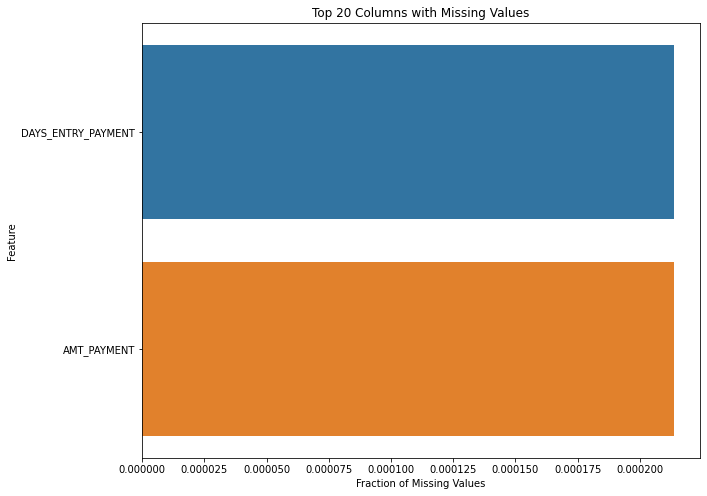

Columns with > 20% missing values: 0


In [36]:
missing = datasets["installments_payments"].isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Show top 20 columns with missing data
plt.figure(figsize=(10, 8))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Feature")
plt.show()

high_missing = missing[missing > 0.2]
print(f"Columns with > 20% missing values: {len(high_missing)}")

## Summary of credit_card_balance

In [37]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [38]:
datasets["credit_card_balance"].describe(include='all')

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count   3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
unique           NaN           NaN             NaN           NaN   
top              NaN           NaN             NaN           NaN   
freq             NaN           NaN             NaN           NaN   
mean    1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std     5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min     1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%     1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%     1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%     2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max     2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

        AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count              3.840312e+06              3.090496e+06   
unique                      NaN                       NaN   
top                         NaN                       NaN   
freq                        NaN                       NaN   
mean               1.538080e+05              5.961325e+03   
std                1.651457e+05              2.822569e+04   
min                0.000000e+00             -6.827310e+03   
25%                4.500000e+04              0.000000e+00   
50%                1.125000e+05              0.000000e+00   
75%                1.800000e+05              0.000000e+00   
max                1.350000e+06              2.115000e+06   

        AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count           3.840312e+06                3.090496e+06   
unique                   NaN                         NaN   
top                      NaN                         NaN   
freq                     NaN                         NaN   
mean            7.433388e+03                2.881696e+02   
std             3.384608e+04                8.201989e+03   
min            -6.211620e+03                0.000000e+00   
25%             0.000000e+00                0.000000e+00   
50%             0.000000e+00                0.000000e+00   
75%             0.000000e+00                0.000000e+00   
max             2.287098e+06                1.529847e+06   

        AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  \
count               3.090496e+06             3.535076e+06  ...   3.840312e+06   
unique                       NaN                      NaN  ...            NaN   
top                          NaN                      NaN  ...            NaN   
freq                         NaN                      NaN  ...            NaN   
mean                2.968805e+03             3.540204e+03  ...   5.808881e+04   
std                 2.079689e+04             5.600154e+03  ...   1.059654e+05   
min                 0.000000e+00             0.000000e+00  ...  -4.202502e+05   
25%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
50%                 0.000000e+00             0.000000e+00  ...   0.000000e+00   
75%                 0.000000e+00             6.633911e+03  ...   8.889949e+04   
max                 2.239274e+06             2.028820e+05  ...   1.493338e+06   

        AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count           3.840312e+06              3.090496e+06          3.840312e+06   
unique                   NaN                       NaN                   NaN   
top                      NaN                       NaN                   NaN   
freq                     NaN                       NaN                   NaN   
mean            5.809829e+04              3.094490e-01          7.031439e-01   
std             1.059718e+05              1.100401e+00          3.190347e+00   
min            -4.202502e+05              0.000000e+00          0.000000e+00   
25%             0.000000e+00              0.000000e+00          0.000000e+00   
50%             0.000000e+00              0.00

                            SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                    1.000000    0.004723        0.003670   
SK_ID_CURR                    0.004723    1.000000        0.001696   
MONTHS_BALANCE                0.003670    0.001696        1.000000   
AMT_BALANCE                   0.005046    0.003510        0.014558   
AMT_CREDIT_LIMIT_ACTUAL       0.006631    0.005991        0.199900   
AMT_DRAWINGS_ATM_CURRENT      0.004342    0.000814        0.036802   
AMT_DRAWINGS_CURRENT          0.002624    0.000708        0.065527   
AMT_DRAWINGS_OTHER_CURRENT   -0.000160    0.000958        0.000405   
AMT_DRAWINGS_POS_CURRENT      0.001721   -0.000786        0.118146   
AMT_INST_MIN_REGULARITY       0.006460    0.003300       -0.087529   
AMT_PAYMENT_CURRENT           0.003472    0.000127        0.076355   
AMT_PAYMENT_TOTAL_CURRENT     0.001641    0.000784        0.035614   
AMT_RECEIVABLE_PRINCIPAL      0.005140    0.003589        0.016266   
AMT_RECIVABLE       

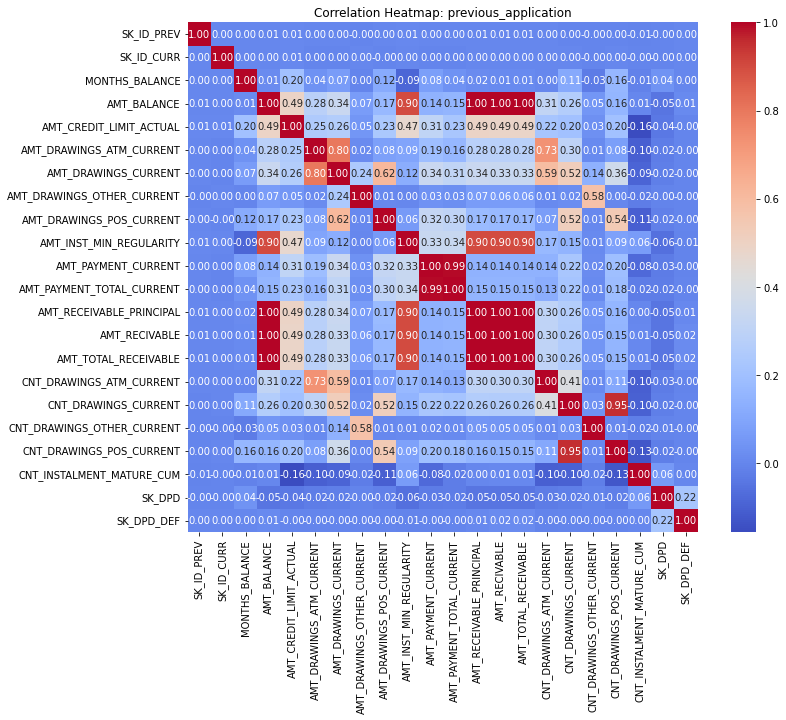

In [39]:
correlations = datasets["credit_card_balance"].corr()

# Print correlations
print(correlations)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap: previous_application")
plt.tight_layout()
plt.show()

In [40]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Missing Percent', "Missing Count"])
missing_application_train_data.head(20)

Missing Percent  Missing Count
AMT_PAYMENT_CURRENT                   20.00         767988
AMT_DRAWINGS_ATM_CURRENT              19.52         749816
CNT_DRAWINGS_POS_CURRENT              19.52         749816
AMT_DRAWINGS_OTHER_CURRENT            19.52         749816
AMT_DRAWINGS_POS_CURRENT              19.52         749816
CNT_DRAWINGS_OTHER_CURRENT            19.52         749816
CNT_DRAWINGS_ATM_CURRENT              19.52         749816
CNT_INSTALMENT_MATURE_CUM              7.95         305236
AMT_INST_MIN_REGULARITY                7.95         305236
SK_ID_PREV                             0.00              0
AMT_TOTAL_RECEIVABLE                   0.00              0
SK_DPD                                 0.00              0
NAME_CONTRACT_STATUS                   0.00              0
CNT_DRAWINGS_CURRENT                   0.00              0
AMT_PAYMENT_TOTAL_CURRENT              0.00              0
AMT_RECIVABLE                          0.00              0
AMT_RECEIVABLE_PRINCIPAL               0.00              0
SK_ID_CURR                             0.00              0
AMT_DRAWINGS_CURRENT                   0.00              0
AMT_CREDIT_LIMIT_ACTUAL                0.00              0

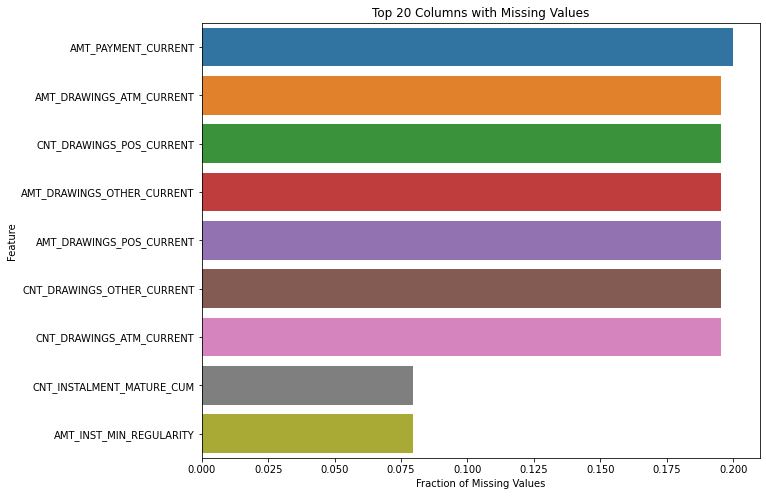

Columns with > 20% missing values: 0


In [41]:
missing = datasets["credit_card_balance"].isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Show top 20 columns with missing data
plt.figure(figsize=(10, 8))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Values")
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Feature")
plt.show()

high_missing = missing[missing > 0.2]
print(f"Columns with > 20% missing values: {len(high_missing)}")

# Dataset questions
## Unique record for each SK_ID_CURR

In [53]:
list(datasets.keys())

['application_train',
 'application_test',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application',
 'POS_CASH_balance']

In [54]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [55]:
# is there an overlap between the test and train customers 
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [56]:
# 
datasets["application_test"].shape

(48744, 121)

In [57]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [5]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

1,670,214 rows, 37 columns


In [6]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [7]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 291,057


In [8]:
#Find the intersection of two arrays.
print(f'Number of train applicants with previous applications is {len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])):,}')

Number of train applicants with previous applications is 47,800


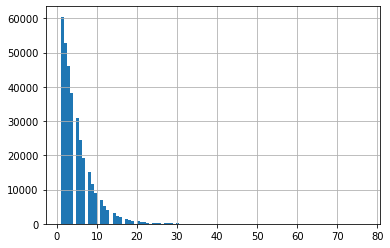

In [9]:
# How many previous applciations  per applicant in the previous_application 
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications
plt.hist(prevAppCounts[prevAppCounts>=0], bins=100)
plt.grid()

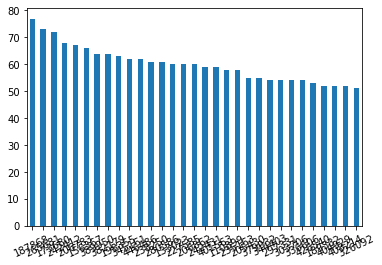

In [10]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Histogram of Number of previous applications for an ID

In [11]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

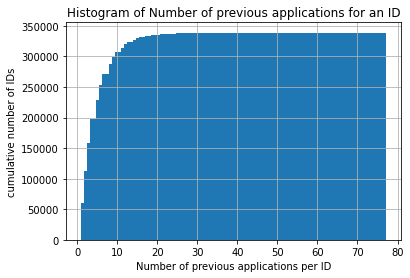

In [12]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [13]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [14]:
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])
display(df)

A    B    C
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
3  NaN  NaN  NaN

In [15]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
#        A    B
#max   NaN  8.0
#min   1.0  2.0
#sum  12.0  NaN

A    B
sum  12.0  NaN
min   1.0  2.0
max   NaN  8.0

In [16]:
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
display(df)

A  B         C
0  1  1  1.637331
1  1  2 -1.466664
2  2  3 -0.041807
3  2  4  1.484758

In [17]:
# group by column A: 
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#    B             C
#  min max       sum
#A
#1   1   2  0.590716
#2   3   4  0.704907

B             C
  min max       sum
A                  
1   1   2  0.170666
2   3   4  1.442951

In [18]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [19]:
funcs = ["a","b","c"]
{f:f"{f}_max" for f in funcs}

{'a': 'a_max', 'b': 'b_max', 'c': 'c_max'}

### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [20]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

In [21]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]["AMT_CREDIT"]

6    0.0
Name: AMT_CREDIT, dtype: float64

In [22]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6     2315218      175704         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
6         0.0               NaN              NaN                    TUESDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
6                       11  ...                  XNA          NaN   

   NAME_YIELD_GROUP  PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
6               XNA                 Cash                 NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
6                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
6                       NaN  

[1 rows x 37 columns]

## Missing values in prevApps

In [23]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [24]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [82]:
# appsDF[agg_op_features].head()

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

#### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [25]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


SK_ID_CURR    SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      100001  1.369693e+06     3951.000         24835.50    23787.00   
1      100002  1.038818e+06     9251.775        179055.00   179055.00   
2      100003  2.281150e+06    56553.990        435436.50   484191.00   
3      100004  1.564014e+06     5357.250         24282.00    20106.00   
4      100005  2.176837e+06     4813.200         22308.75    20076.75   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0            2520.0          24835.5                13.000000   
1               0.0         179055.0                 9.000000   
2            3442.5         435436.5                14.666667   
3            4860.0          24282.0                 5.000000   
4            4464.0          44617.5                10.500000   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  RATE_INTEREST_PRIVILEGED  \
0                     1.0           0.104326  ...                       NaN   
1                     1.0           0.000000  ...                       NaN   
2                     1.0           0.050030  ...                       NaN   
3                     1.0           0.212008  ...                       NaN   
4                     1.0           0.108964  ...                       NaN   

   DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
0        -1740.0              23.0          8.0            365243.0   
1         -606.0             500.0         24.0            365243.0   
2        -1305.0             533.0         10.0            365243.0   
3         -815.0              30.0          4.0            365243.0   
4         -536.0              18.0         12.0            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0    -1709.000000               -1499.000000   -1619.000000      -1612.000000   
1     -565.000000                 125.000000     -25.000000        -17.000000   
2    -1274.333333               -1004.333333   -1054.333333      -1047.333333   
3     -784.000000                -694.000000    -724.000000       -714.000000   
4     -706.000000                -376.000000    -466.000000       -460.000000   

   NFLAG_INSURED_ON_APPROVAL  
0                   0.000000  
1                   0.000000  
2                   0.666667  
3                   0.000000  
4                   0.000000  

[5 rows x 21 columns]

--------------------------------------------------


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0            100001         3951.000         3951.000       3951.000000   
1            100002         9251.775         9251.775       9251.775000   
2            100003         6737.310        98356.995      56553.990000   
3            100004         5357.250         5357.250       5357.250000   
4            100005         4813.200         4813.200       4813.200000   
...             ...              ...              ...               ...   
338852       456251         6605.910         6605.910       6605.910000   
338853       456252        10074.465        10074.465      10074.465000   
338854       456253         3973.095         5567.715       4770.405000   
338855       456254         2296.440        19065.825      10681.132500   
338856       456255         2250.000        54022.140      20775.391875   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  
0                   24835.5              24835.5             24835.500  
1                  179055.0             179055.0            179055.000  
2                   68809.5             900000.0            435436.500  
3                   24282.0              24282.0             24282.000  
4                       0.0              44617.5             22308.750  
...                     ...                  ...                   ...  
338852              40455.0              40455.0             40455.000  
338853              57595.5              57595.5             57595.500  
338854              19413.0              28912.5             24162.750  
338855              18846.0             223789.5            121317.750  
338856              45000.0            1170000.0            362770.875  

[338857 rows x 7 columns]

result.shape: (338857, 8)


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0       100001         3951.000         3951.000       3951.000000   
1       100002         9251.775         9251.775       9251.775000   
2       100003         6737.310        98356.995      56553.990000   
3       100004         5357.250         5357.250       5357.250000   
4       100005         4813.200         4813.200       4813.200000   
5       100006         2482.920        39954.510      23651.175000   
6       100007         1834.290        22678.785      12278.805000   
7       100008         8019.090        25309.575      15839.696250   
8       100009         7435.845        17341.605      10051.412143   
9       100010        27463.410        27463.410      27463.410000   

   AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  \
0              24835.5              24835.5          24835.500000   
1             179055.0             179055.0         179055.000000   
2              68809.5             900000.0         435436.500000   
3              24282.0              24282.0          24282.000000   
4                  0.0              44617.5          22308.750000   
5                  0.0             688500.0         272203.260000   
6              17176.5             247500.0         150530.250000   
7                  0.0             450000.0         155701.800000   
8              40455.0             110160.0          76741.714286   
9             247212.0             247212.0         247212.000000   

   range_AMT_APPLICATION  
0                    0.0  
1                    0.0  
2               831190.5  
3                    0.0  
4                44617.5  
5               688500.0  
6               230323.5  
7               450000.0  
8                69705.0  
9                    0.0

In [26]:
result.isna().sum()

SK_ID_CURR_                0
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_ANNUITY_mean         480
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
AMT_APPLICATION_mean       0
range_AMT_APPLICATION      0
dtype: int64

## feature transformer for prevApp table

In [27]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = [f"{feat}_{agg}" for feat, agg in result.columns]
        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)
# Yes, it is better to make the text data in the columns to standardise the data and remove the inconsistencies.

df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

#### Join the labeled dataset

In [28]:
~3==3

False

In [29]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [37]:
bureau_agg = datasets['bureau'].groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': 'mean',
    'AMT_CREDIT_SUM_DEBT': 'mean',
    'AMT_CREDIT_SUM_LIMIT': 'mean',
    'SK_ID_BUREAU': 'count'
}).reset_index()
bureau_agg

SK_ID_CURR  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
0           100001    2.076236e+05         85240.928571               0.00000   
1           100002    1.081319e+05         49156.200000            7997.14125   
2           100003    2.543501e+05             0.000000          202500.00000   
3           100004    9.451890e+04             0.000000               0.00000   
4           100005    2.190420e+05        189469.500000               0.00000   
...            ...             ...                  ...                   ...   
305806      456249    2.841430e+05         16307.100000               0.00000   
305807      456250    1.028820e+06        744013.365000           19422.79500   
305808      456253    9.900000e+05        448958.250000               0.00000   
305809      456254    4.500000e+04             0.000000                   NaN   
305810      456255    3.456290e+05        191864.126250               0.00000   

        SK_ID_BUREAU  
0                  7  
1                  8  
2                  4  
3                  2  
4                  3  
...              ...  
305806            13  
305807             3  
305808             4  
305809             1  
305810            11  

[305811 rows x 5 columns]

In [38]:
# Bureau
bureau_agg = datasets['bureau'].groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': 'mean',
    'AMT_CREDIT_SUM_DEBT': 'mean',
    'AMT_CREDIT_SUM_LIMIT': 'mean',
    'SK_ID_BUREAU': 'count'
}).reset_index()
bureau_agg.columns = ['SK_ID_CURR','AMT_CREDIT_SUM_mean', 'AMT_CREDIT_SUM_DEBT_mean', 'AMT_CREDIT_SUM_LIMIT_mean', 'COUNT']

# Installments Payments
installments_agg = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    'AMT_INSTALMENT': 'mean',
    'AMT_PAYMENT': 'mean'
}).reset_index()
installments_agg.columns = ['SK_ID_CURR','AMT_INSTALMENT_mean', 'AMT_PAYMENT_mean']

# Credit Card Balance
creditcard_agg = datasets['credit_card_balance'].groupby('SK_ID_CURR').agg({
    'AMT_DRAWINGS_CURRENT': 'mean',
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean',
    'AMT_PAYMENT_TOTAL_CURRENT': 'mean',
    'AMT_TOTAL_RECEIVABLE': 'mean'
}).reset_index()
creditcard_agg.columns = ['SK_ID_CURR','AMT_DRAWINGS_CURRENT_mean', 'AMT_CREDIT_LIMIT_ACTUAL_mean',
                          'AMT_PAYMENT_TOTAL_CURRENT_mean', 'AMT_TOTAL_RECEIVABLE_mean']

# POS_CASH_balance
poscash_agg = datasets['POS_CASH_balance'].groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': 'mean',
    'CNT_INSTALMENT': 'mean',
    'CNT_INSTALMENT_FUTURE': 'mean'
}).reset_index()
poscash_agg.columns = ['SK_ID_CURR','MONTHS_BALANCE_mean', 'CNT_INSTALMENT_mean', 'CNT_INSTALMENT_FUTURE_mean']


In [31]:

features = ['AMT_ANNUITY', 'AMT_APPLICATION']
# prevApps_feature_pipeline = Pipeline([
#         ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
#         ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
#         ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
#     ])


X_train= datasets["application_train"] #primary dataset
appsDF = datasets["previous_application"] #prev app


merge_all_data = False

# transform all the secondary tables
# 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# 'previous_application', 'POS_CASH_balance'

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
    #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
    # 'previous_application', 'POS_CASH_balance'

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_train = X_train.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Bureau Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #dX_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # ......
        # -------------------------------
    # Step 1: Aggregate secondary tables
    # -------------------------------

 
    X_train = X_train.merge(bureau_agg, how='left', on='SK_ID_CURR')
    print("After merging bureau_agg:", X_train.shape)

    X_train = X_train.merge(installments_agg, how='left', on='SK_ID_CURR')
    print("After merging installments_agg:", X_train.shape)

    X_train = X_train.merge(creditcard_agg, how='left', on='SK_ID_CURR')
    print("After merging creditcard_agg:", X_train.shape)

    X_train = X_train.merge(poscash_agg, how='left', on='SK_ID_CURR')
    print("After merging poscash_agg:", X_train.shape)

    

## Join the unlabeled dataset (i.e., the submission file)

In [40]:

X_kaggle_test= datasets["application_test"]
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    X_kaggle_test = X_kaggle_test.merge(bureau_agg, how='left', on='SK_ID_CURR')
    print("After merging bureau_agg:", X_train.shape)

    X_kaggle_test = X_kaggle_test.merge(installments_agg, how='left', on='SK_ID_CURR')
    print("After merging installments_agg:", X_train.shape)

    X_kaggle_test = X_kaggle_test.merge(creditcard_agg, how='left', on='SK_ID_CURR')
    print("After merging creditcard_agg:", X_train.shape)

    X_kaggle_test = X_kaggle_test.merge(poscash_agg, how='left', on='SK_ID_CURR')
    print("After merging poscash_agg:", X_train.shape)


In [43]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [44]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split
import pandas as pd


# Split into Train / Test
X_train, X_test, y_train, y_test = train_test_split(X_train.drop(columns=['SK_ID_CURR','TARGET']), pd.DataFrame(X_train['TARGET'], columns=["TARGET"]), test_size=0.2, random_state=42)

# Split Train into Train / Validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_kaggle_test = X_kaggle_test.drop(columns=['SK_ID_CURR'])


print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (196806, 120)
X validation      shape: (49202, 120)
X test            shape: (61503, 120)
X X_kaggle_test   shape: (48744, 120)


In [45]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [46]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]
# Identify column types
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()


# Numerical pipeline
numeric_pipeline = Pipeline([
    ('select_numeric', DataFrameSelector(numeric_cols)),
    ('impute_missing', SimpleImputer(strategy='mean')),
    ('scale_features', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('select_categorical', DataFrameSelector(categorical_cols)),
    ('impute_missing', SimpleImputer(strategy='most_frequent')),
    ('encode_onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])
data_prep_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numeric_pipeline),
    ("categorical_pipeline", categorical_pipeline),
])

selected_features = numeric_cols + categorical_cols 



In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


X_train.shape: (196806, 120)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
9717    Security staff
203356     Sales staff
81757         HR staff
84860      Accountants
234668  Medicine staff
X_train.shape: (196806, 120)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
9717    Security staff
203356     Sales staff
81757         HR staff
84860      Accountants
234668  Medicine staff
Test driver: 
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
X_train['name'][0:10]: 
              OCCUPATION_TYPE
9717           Security staff
203356            Sales staff
81757                HR staff
84860             Accountants
234668         Medicine staff
199762               Laborers
147827  High skill tech staff
4685              Sales staff
54385                Managers
47787             Sales staff


In [48]:
# # Identify the numeric features we wish to consider. 
# num_attribs = [
#     'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
#     'EXT_SOURCE_2','EXT_SOURCE_3']

# num_pipeline = Pipeline([
#         ('selector', DataFrameSelector(num_attribs)),
#         ('imputer', SimpleImputer(strategy='mean')),
#         ('std_scaler', StandardScaler()),
#     ])
# # Identify the categorical features we wish to consider.
# cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#                'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# # Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# # do NOT occur in the training set
# cat_pipeline = Pipeline([
#         ('selector', DataFrameSelector(cat_attribs)),
#         #('imputer', SimpleImputer(strategy='most_frequent')),
#         ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#         ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
#     ])

# data_prep_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", num_pipeline),
#         ("cat_pipeline", cat_pipeline),
#     ])
              



In [49]:
list(datasets["application_train"].columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [50]:
def pct(x):
    return round(100*x,3)

In [51]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [52]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: user 26.6 s, sys: 18 s, total: 44.6 s
Wall time: 5.31 s


In [53]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.92

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

define the following with clarity

accuracy_score
Confusion matrix
Recal
Precision
F1 score
ROC
AUC

1. Accuracy Score:
   Definition: The accuracy score is the proportion of correctly predicted instances out of all instances in the dataset.
   Formula: 
     
     Accuracy = (True Positives + True Negatives)\Total Population
     
   Use: It gives an overall measure of how well the model is performing, but can be misleading if the dataset is imbalanced.

2. Confusion Matrix:
   Definition: A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of actual vs predicted values in terms of:
     True Positives (TP): Correctly predicted positive instances.
     True Negatives (TN): Correctly predicted negative instances.
     False Positives (FP): Negative instances incorrectly predicted as positive.
     False Negatives (FN): Positive instances incorrectly predicted as negative.
   Use: It helps in calculating other metrics like precision, recall, F1 score, etc.

3. Recall (Sensitivity or True Positive Rate):
   Definition: Recall is the proportion of actual positive instances correctly identified by the model.
   Formula: 
     Recall = True Positives\(True Positives + False Negatives)
     
   Use: It indicates how well the model identifies positive instances. High recall means fewer false negatives.

4. Precision:
   Definition: Precision is the proportion of positive predictions that are actually correct.
   Formula: 
     Precision = True Positives\(True Positives + False Positives)
     
   Use: It tells you how reliable the positive predictions are. High precision means fewer false positives.

5. F1 Score:
   Definition: The F1 score is the harmonic mean of precision and recall. It balances both precision and recall into a single metric.
   Formula: 
     F1 Score = 2 * ((Precision * Recall)\(Precision + Recall))
     
   Use: It is especially useful when the class distribution is imbalanced, as it gives a single measure of a model’s performance across both precision and recall.

6. ROC (Receiver Operating Characteristic) Curve:
   Definition: The ROC curve is a graphical representation of a model’s ability to discriminate between positive and negative classes. It plots the True Positive Rate (recall) against the False Positive Rate (1 - specificity).
   Use: It shows how the model’s classification performance changes at different thresholds. The area under the ROC curve (AUC) can also help compare models.

7. AUC (Area Under the ROC Curve):
   Definition: AUC represents the area under the ROC curve, giving a single value that summarizes the model's ability to distinguish between the classes.
   Range: The AUC ranges from 0 to 1, where 1 indicates perfect performance and 0.5 indicates random guessing.
   Use: AUC is useful for comparing the overall performance of different models, particularly when the classes are imbalanced.

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


In [55]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_120_features     0.9195     0.9176     0.9193     0.7493   

   Valid AUC  Test  AUC  
0     0.7412     0.7454

In [56]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
def log_model_performance(name, model, X_train, y_train, X_valid, y_valid, X_test, y_test):
    expLog.loc[len(expLog)] = [name] + list(np.round([
        accuracy_score(y_train, model.predict(X_train)),
        accuracy_score(y_valid, model.predict(X_valid)),
        accuracy_score(y_test, model.predict(X_test)),
        roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
        roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    ], 4))

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_model_diagnostics(model, 
                                X_train, y_train, 
                                X_valid, y_valid, 
                                X_test, y_test, 
                                title_prefix="Model"):
    
    datasets = {
        "Train": (X_train, y_train),
        "Valid": (X_valid, y_valid),
        "Test": (X_test, y_test)
    }

    # Unified color map
    color_map = {
        "Train": "#2ca02c",  # green
        "Valid": "#1f77b4",  # blue
        "Test":  "#d62728"   # red
    }

    # --- ROC Curve Plot ---
    plt.figure(figsize=(8, 6))
    for split, (X, y) in datasets.items():
        probs = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, probs)
        auc = roc_auc_score(y, probs)
        plt.plot(fpr, tpr, label=f"{split} (AUC = {auc:.3f})", color=color_map[split], linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.title(f"{title_prefix} – ROC Curves", fontsize=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Confusion Matrix Plots with F1 Scores ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    for i, (split, (X, y)) in enumerate(datasets.items()):
        preds = model.predict(X)
        cm = confusion_matrix(y, preds)
        f1 = f1_score(y, preds)
        sns.heatmap(cm, annot=True, fmt='d',
                    cmap=sns.light_palette(color_map[split], as_cmap=True),
                    ax=axes[i])
        axes[i].set_title(f"{split} Confusion Matrix\nF1 Score = {f1:.3f}", fontsize=12)
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

    plt.suptitle(f"{title_prefix} – Confusion Matrices", fontsize=14)
    plt.tight_layout()
    plt.show()


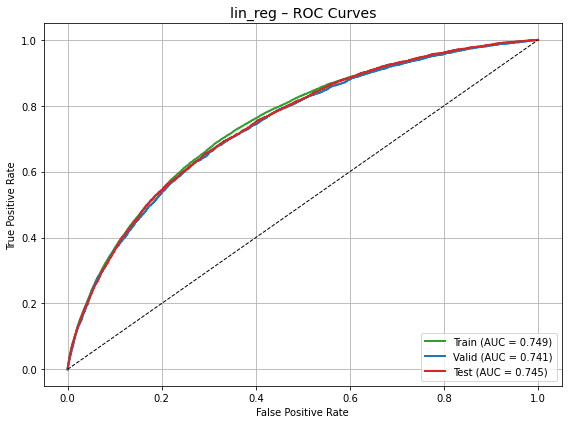

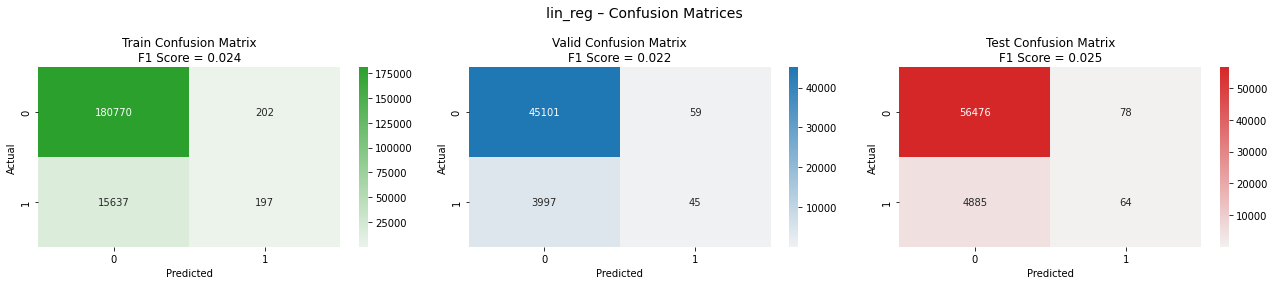

In [77]:
plot_all_model_diagnostics(model, 
                                X_train, y_train, 
                                X_valid, y_valid, 
                                X_test, y_test, 
                                title_prefix="lin_reg")


## Logistic regression with ridge


write and explain



Logistic Regression with Ridge Regularization is applied using the LogisticRegression(penalty='l2') classifier in a pipeline. The regularization (L2) term ensures that the model does not overfit by shrinking the coefficients of the features, particularly when there are many features or the data is noisy. After training the model on the training set, its performance is evaluated on different datasets (training, validation, and test) using the log_model_performance function. This setup is robust for making reliable predictions and is commonly used when dealing with high-dimensional data or when you want to avoid overfitting in classification tasks

In [57]:
log_ridge = Pipeline([
    ("prep", data_prep_pipeline),
    ("clf", LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42))
])
log_ridge.fit(X_train, y_train)
log_model_performance("Logistic_Ridge", log_ridge, X_train, y_train, X_valid, y_valid, X_test, y_test)



Pipeline(steps=[('prep',
                 FeatureUnion(transformer_list=[('numerical_pipeline',
                                                 Pipeline(steps=[('select_numeric',
                                                                  DataFrameSelector(attribute_names=['CNT_CHILDREN',
                                                                                                     'AMT_INCOME_TOTAL',
                                                                                                     'AMT_CREDIT',
                                                                                                     'AMT_ANNUITY',
                                                                                                     'AMT_GOODS_PRICE',
                                                                                                     'REGION_POPULATION_RELATIVE',
                                                                                                    

In [58]:
log_model_performance("Logistic_Ridge", log_ridge, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

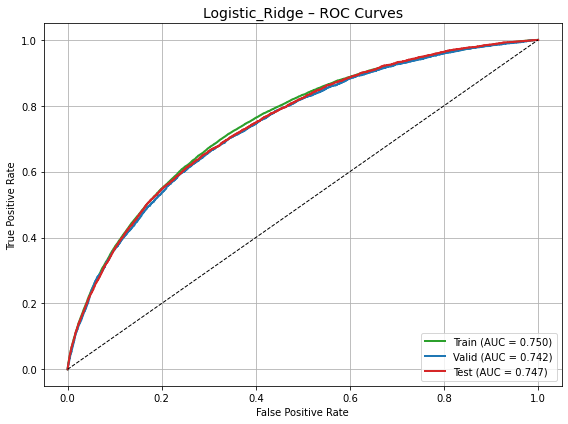

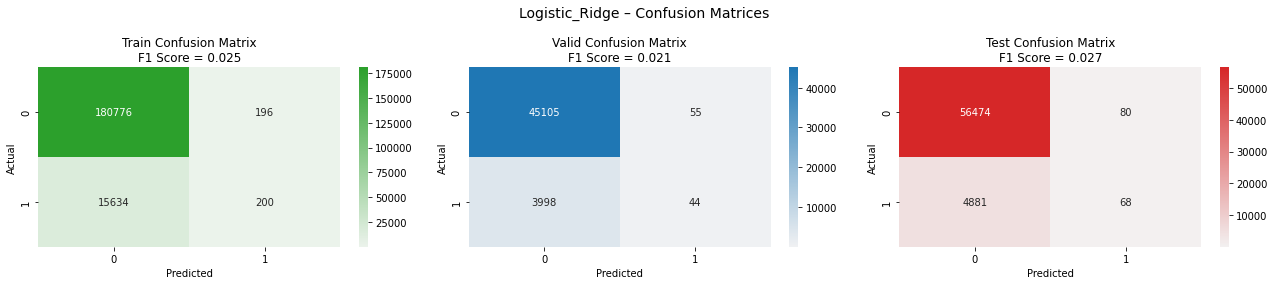

In [78]:
plot_all_model_diagnostics(log_ridge, 
                                X_train, y_train, 
                                X_valid, y_valid, 
                                X_test, y_test, 
                                title_prefix="Logistic_Ridge")

## Logistic regression with Lasso


write and explain




The below code applies Logistic Regression with Lasso Regularization to the given dataset using a Pipeline. The pipeline ensures that the data preprocessing steps (like scaling, encoding, etc.) are consistently applied before fitting the model. The Lasso Regularization (L1 penalty) encourages sparsity by shrinking the coefficients of less important features to zero, which not only prevents overfitting but also helps in feature selection. This makes Lasso especially useful in high-dimensional datasets where some features may be irrelevant. The log_lasso.fit(X_train, y_train) line trains the model, and the model's performance can be evaluated further by evaluating it on the validation or test datasets.

In [60]:
log_lasso = Pipeline([
    ("prep", data_prep_pipeline),
    ("clf", LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42))
])
log_lasso.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 FeatureUnion(transformer_list=[('numerical_pipeline',
                                                 Pipeline(steps=[('select_numeric',
                                                                  DataFrameSelector(attribute_names=['CNT_CHILDREN',
                                                                                                     'AMT_INCOME_TOTAL',
                                                                                                     'AMT_CREDIT',
                                                                                                     'AMT_ANNUITY',
                                                                                                     'AMT_GOODS_PRICE',
                                                                                                     'REGION_POPULATION_RELATIVE',
                                                                                                    

In [61]:
log_model_performance("Logistic_Lasso", log_lasso, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_120_features     0.9195     0.9176     0.9193     0.7493   
1         Logistic_Ridge     0.9196     0.9176     0.9193     0.7503   
2         Logistic_Lasso     0.9195     0.9177     0.9193     0.7503   

   Valid AUC  Test  AUC  
0     0.7412     0.7454  
1     0.7423     0.7465  
2     0.7425     0.7469

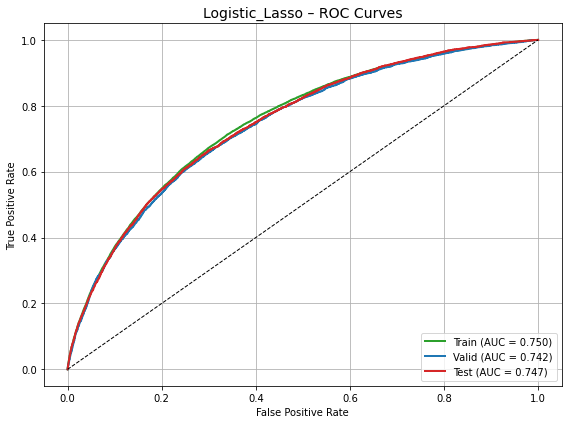

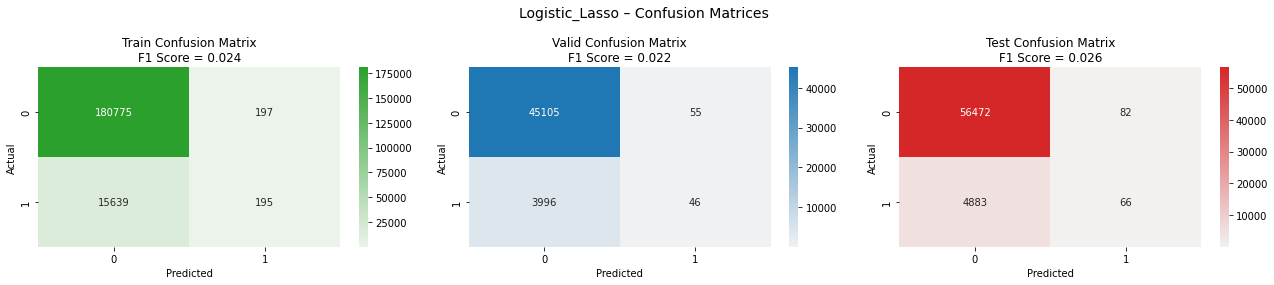

In [79]:
plot_all_model_diagnostics(log_lasso, 
                                X_train, y_train, 
                                X_valid, y_valid, 
                                X_test, y_test, 
                                title_prefix="Logistic_Lasso")

## SGD Lasso


write and explain




The below code uses SGDClassifier with logistic loss and L2 regularization to train a binary classifier. The SGDClassifier uses Stochastic Gradient Descent to optimize the logistic loss function, which is suitable for binary classification tasks. The L2 regularization (Ridge) is applied to penalize large coefficients, preventing overfitting by shrinking the coefficients of less important features, but not eliminating them entirely. The Pipeline ensures that preprocessing steps are applied consistently before training the model. This setup is useful for efficiently training models on large datasets while avoiding overfitting and ensuring that the model is generalized well.

In [63]:
from sklearn.linear_model import SGDClassifier

sgd_log = Pipeline([
    ("prep", data_prep_pipeline),
    ("clf", SGDClassifier(loss='log', penalty='l2', max_iter=1000, random_state=42))
])
sgd_log.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 FeatureUnion(transformer_list=[('numerical_pipeline',
                                                 Pipeline(steps=[('select_numeric',
                                                                  DataFrameSelector(attribute_names=['CNT_CHILDREN',
                                                                                                     'AMT_INCOME_TOTAL',
                                                                                                     'AMT_CREDIT',
                                                                                                     'AMT_ANNUITY',
                                                                                                     'AMT_GOODS_PRICE',
                                                                                                     'REGION_POPULATION_RELATIVE',
                                                                                                    

In [64]:
log_model_performance("SGD_Logistic_lasso", sgd_log, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_120_features     0.9195     0.9176     0.9193     0.7493   
1         Logistic_Ridge     0.9196     0.9176     0.9193     0.7503   
2         Logistic_Lasso     0.9195     0.9177     0.9193     0.7503   
3           SGD_Logistic     0.9192     0.9175     0.9191     0.7377   

   Valid AUC  Test  AUC  
0     0.7412     0.7454  
1     0.7423     0.7465  
2     0.7425     0.7469  
3     0.7310     0.7343

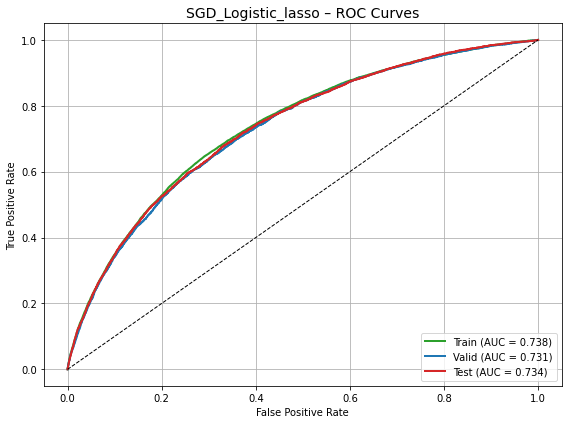

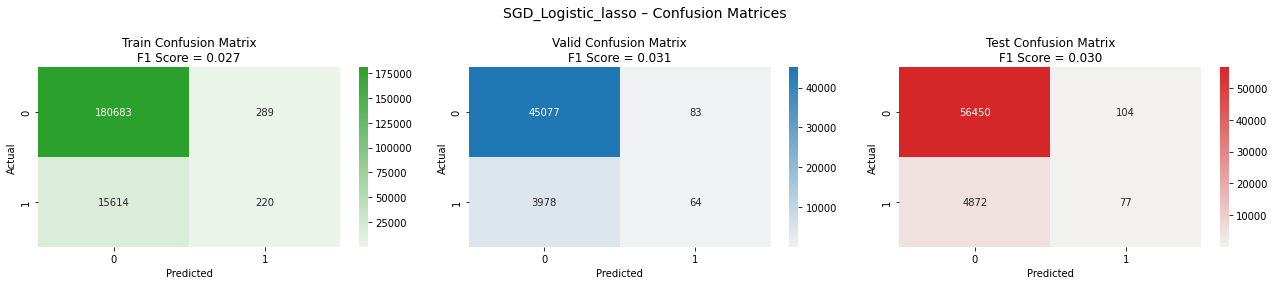

In [80]:
plot_all_model_diagnostics(sgd_log, 
                                X_train, y_train, 
                                X_valid, y_valid, 
                                X_test, y_test, 
                                title_prefix="SGD_Logistic_lasso")

## Random Forest


write and explain




The below code uses the Random Forest Classifier to train a classification model on the given dataset. It employs a Pipeline that combines data preprocessing (defined in data_prep_pipeline) and model fitting into a seamless workflow. The Random Forest model is built by training multiple decision trees, each on a random subset of the data and features. The final prediction is made by aggregating the predictions of all the trees. The random_state=42 ensures that the results are reproducible.
Random Forest is a robust, powerful algorithm that helps in preventing overfitting, handling non-linearity, and providing insights into feature importance. This makes it suitable for a wide range of classification tasks, particularly when you have complex data or need to identify key features for your predictions.

In [65]:
rf_model = Pipeline([
    ("prep", data_prep_pipeline),
    ("rf", RandomForestClassifier(random_state=42))
])
rf_model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 FeatureUnion(transformer_list=[('numerical_pipeline',
                                                 Pipeline(steps=[('select_numeric',
                                                                  DataFrameSelector(attribute_names=['CNT_CHILDREN',
                                                                                                     'AMT_INCOME_TOTAL',
                                                                                                     'AMT_CREDIT',
                                                                                                     'AMT_ANNUITY',
                                                                                                     'AMT_GOODS_PRICE',
                                                                                                     'REGION_POPULATION_RELATIVE',
                                                                                                    

In [66]:
log_model_performance("RandomForest", rf_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_120_features     0.9195     0.9176     0.9193     0.7493   
1         Logistic_Ridge     0.9196     0.9176     0.9193     0.7503   
2         Logistic_Lasso     0.9195     0.9177     0.9193     0.7503   
3           SGD_Logistic     0.9192     0.9175     0.9191     0.7377   
4           RandomForest     1.0000     0.9180     0.9196     1.0000   

   Valid AUC  Test  AUC  
0     0.7412     0.7454  
1     0.7423     0.7465  
2     0.7425     0.7469  
3     0.7310     0.7343  
4     0.7085     0.7098

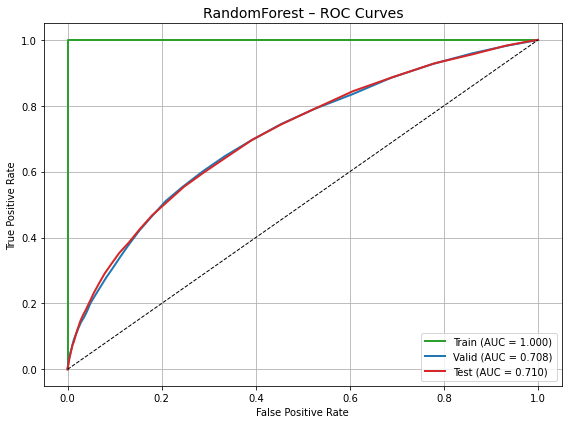

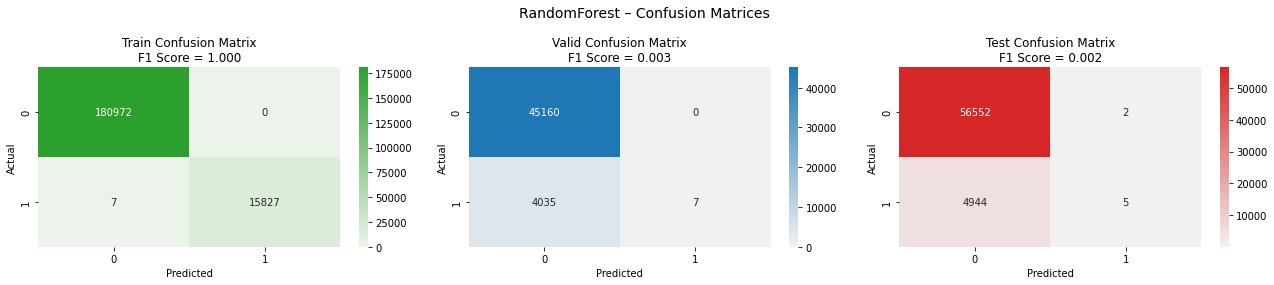

In [81]:
plot_all_model_diagnostics(rf_model, 
                                X_train, y_train, 
                                X_valid, y_valid, 
                                X_test, y_test, 
                                title_prefix="RandomForest")

## XGBoost


write and explain




The below code applies the XGBoost Classifier to train a model on the given dataset. It uses a Pipeline that combines data preprocessing (defined in data_prep_pipeline) and model training in one unified workflow. The XGBoost algorithm builds an ensemble of decision trees, where each tree corrects the errors of the previous ones. The model is trained using logarithmic loss as the evaluation metric, and regularization (L1 and L2) is applied to prevent overfitting and improve the model's generalization.

XGBoost is a highly efficient, accurate, and scalable algorithm that works well for classification tasks, particularly when you have a large and complex dataset. It automatically handles missing data, can be parallelized for faster training, and offers excellent performance on a wide range of machine learning problems.

In [67]:
xgb_model = Pipeline([
    ("prep", data_prep_pipeline),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
xgb_model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 FeatureUnion(transformer_list=[('numerical_pipeline',
                                                 Pipeline(steps=[('select_numeric',
                                                                  DataFrameSelector(attribute_names=['CNT_CHILDREN',
                                                                                                     'AMT_INCOME_TOTAL',
                                                                                                     'AMT_CREDIT',
                                                                                                     'AMT_ANNUITY',
                                                                                                     'AMT_GOODS_PRICE',
                                                                                                     'REGION_POPULATION_RELATIVE',
                                                                                                    

In [68]:
log_model_performance("XGBoost", xgb_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_120_features     0.9195     0.9176     0.9193     0.7493   
1         Logistic_Ridge     0.9196     0.9176     0.9193     0.7503   
2         Logistic_Lasso     0.9195     0.9177     0.9193     0.7503   
3           SGD_Logistic     0.9192     0.9175     0.9191     0.7377   
4           RandomForest     1.0000     0.9180     0.9196     1.0000   
5                XGBoost     0.9250     0.9170     0.9191     0.8599   

   Valid AUC  Test  AUC  
0     0.7412     0.7454  
1     0.7423     0.7465  
2     0.7425     0.7469  
3     0.7310     0.7343  
4     0.7085     0.7098  
5     0.7415     0.7473

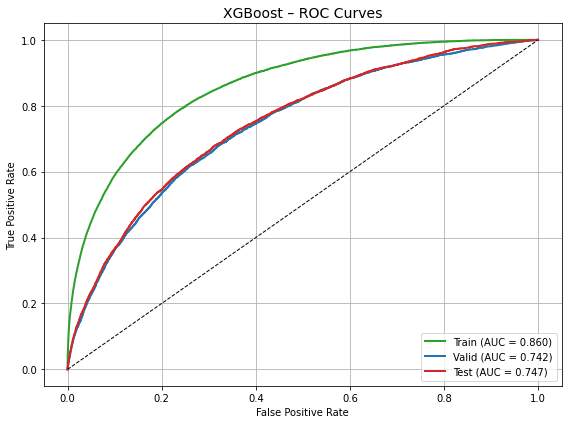

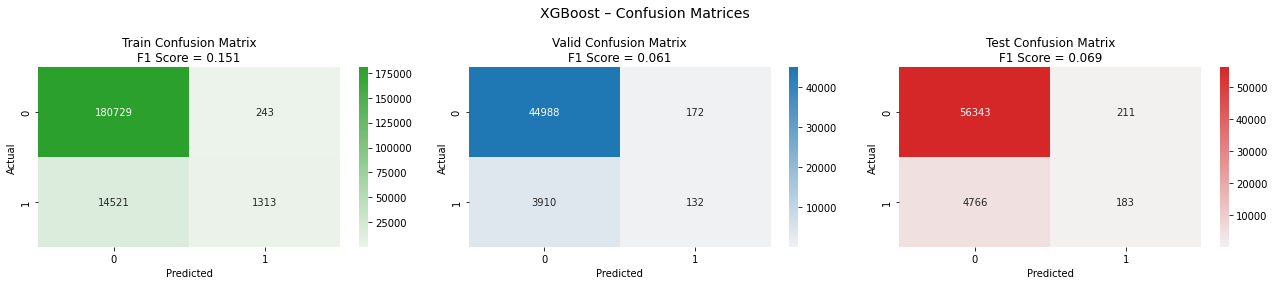

In [82]:
plot_all_model_diagnostics(xgb_model, 
                                X_train, y_train, 
                                X_valid, y_valid, 
                                X_test, y_test, 
                                title_prefix="XGBoost")

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [83]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [84]:
test_class_scores[0:10]

array([0.05929316, 0.23467242, 0.06112955, 0.03099732, 0.12537516,
       0.02719178, 0.02165066, 0.09429481, 0.01691175, 0.10228642])

In [85]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.059293
1      100005  0.234672
2      100013  0.061130
3      100028  0.030997
4      100038  0.125375

In [86]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [87]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|███████████████████████████████████████| 1.26M/1.26M [00:01<00:00, 922kB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

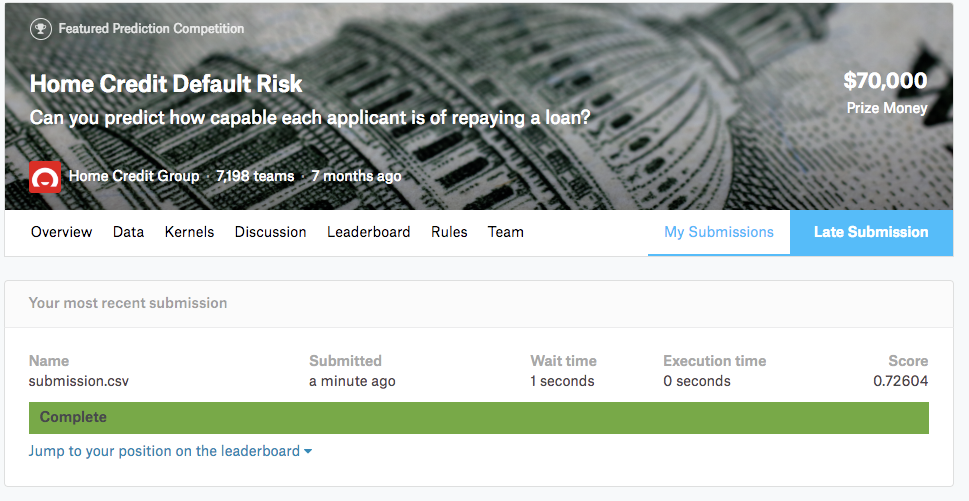

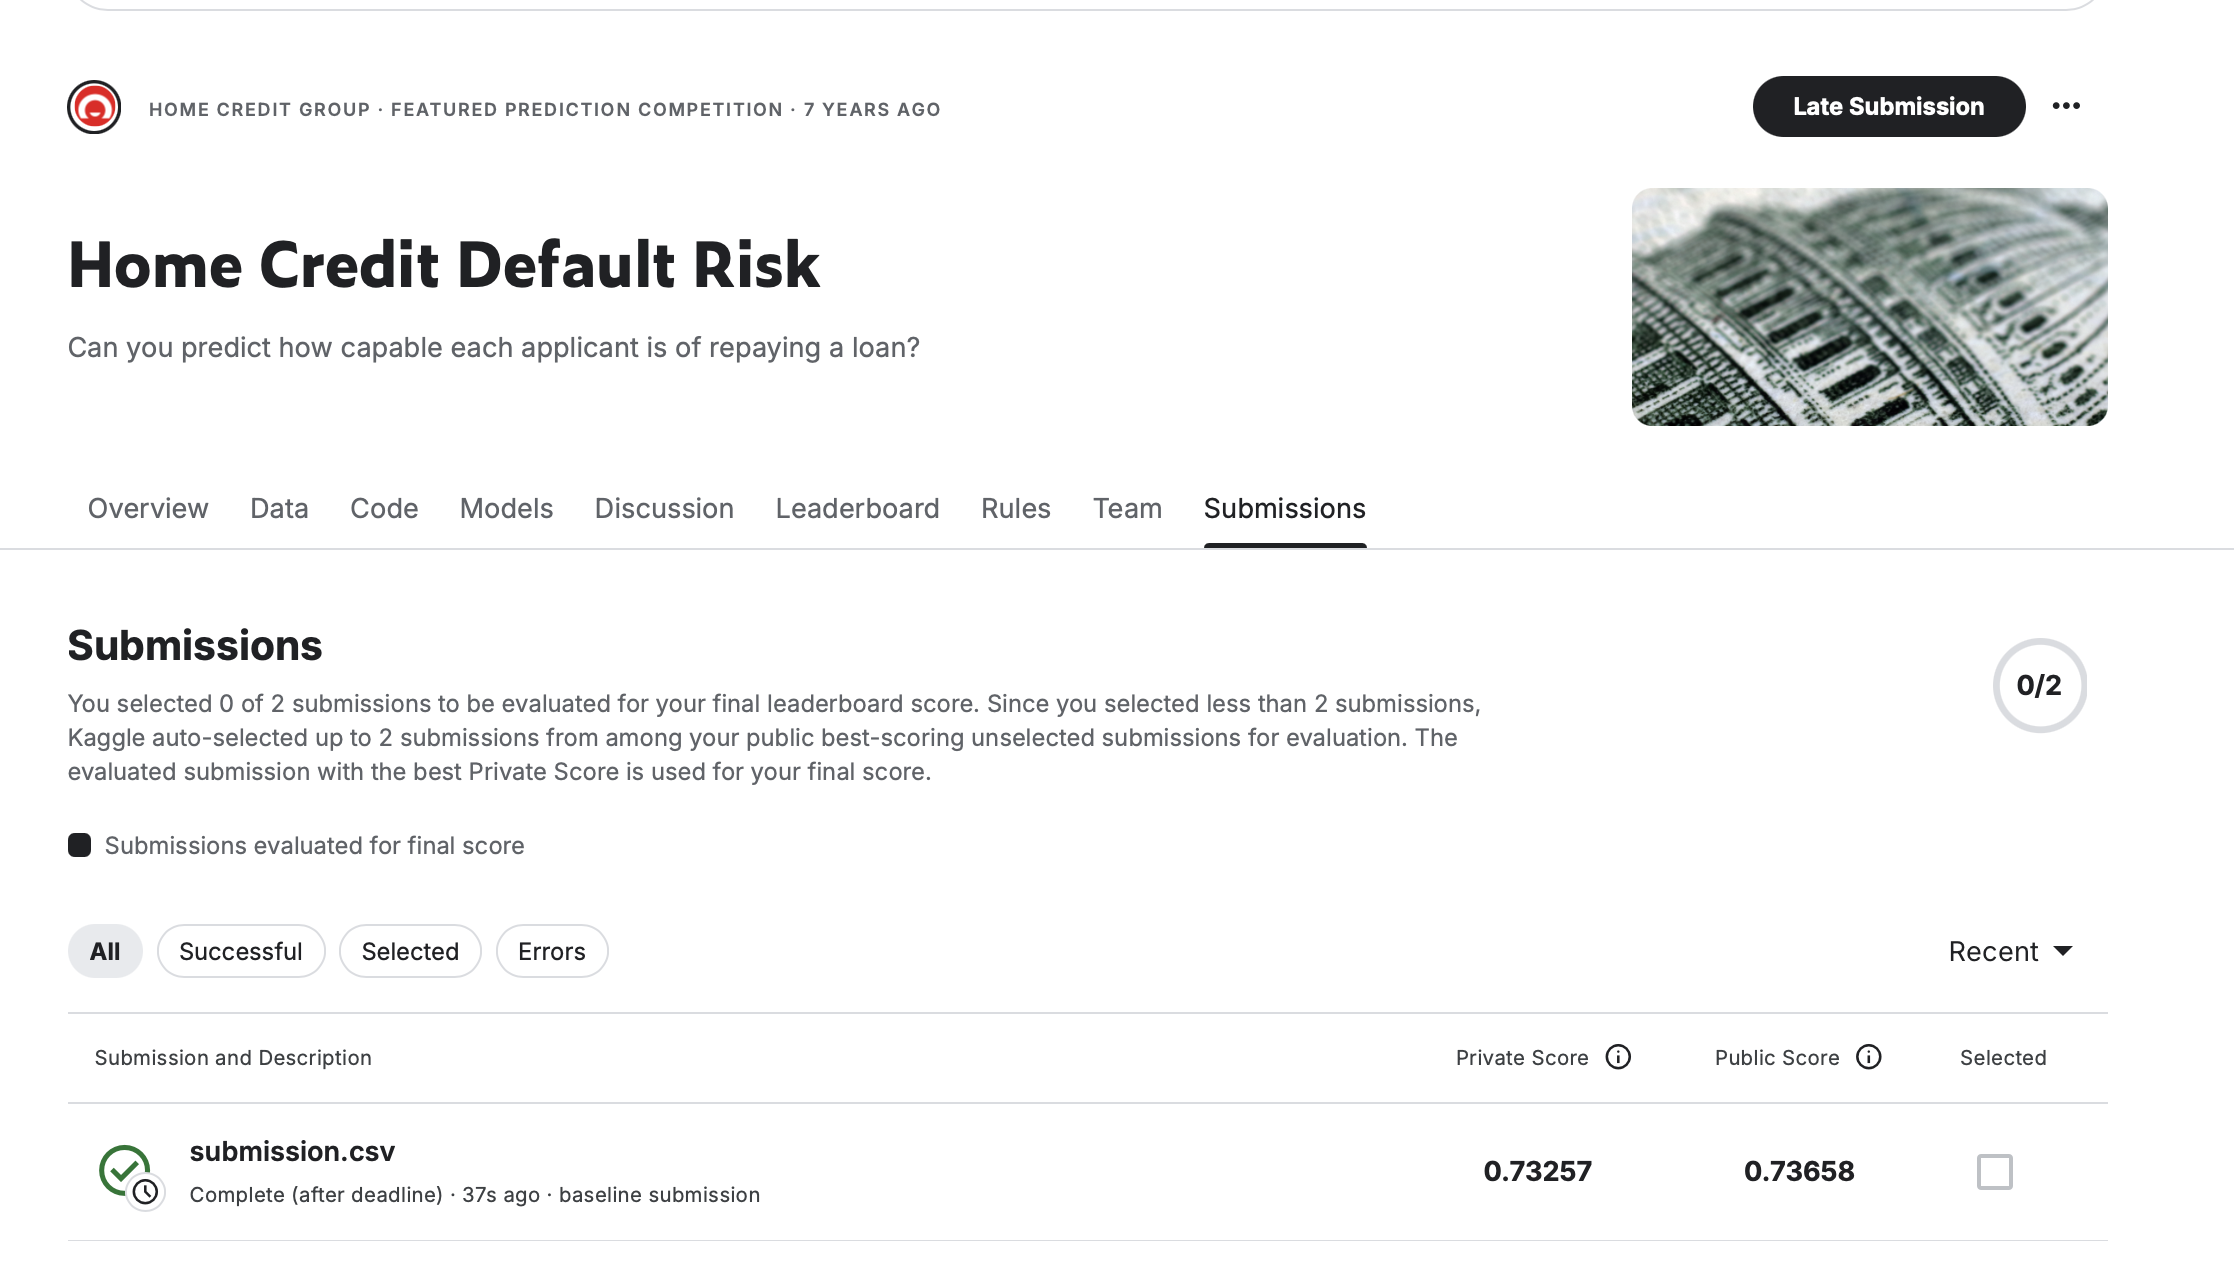

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 

## Abstract
Access to credit remains a substantial obstacle for people with little or no credit history, frequently leading in exclusion from formal financial systems and exposure to predatory lending.  This research uses the Home Credit Default Risk dataset to forecast the likelihood of loan payback, with the goal of promoting financial inclusion.  The dataset combines several numerical and categorical variables gleaned from previous loan applications, credit agency reports, and demographic data.  To prepare the data, a structured pipeline was created that involves combining pertinent tables, addressing missing values, encoding categorical variables, and identifying critical features based on analysis and domain experience.
A baseline LightGBM model was trained on the cleaned dataset, and its performance was assessed using the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC), which assesses the model's capacity to distinguish between defaulters and non-defaulters.  This foundational model lays the groundwork for incremental improvements using techniques like advanced feature engineering, model assembly, and hyperparameter tuning.  The overall purpose of this project is to improve loan decision-making processes by finding creditworthy clients who might otherwise be overlooked by traditional scoring methodologies, resulting in more equitable and responsible lending practices.

## Introduction
The Home Credit Default Risk (HCDR) project is where one predicts whether or not a client will repay a loan. The competition is to develop a robust predictive model based on a variety of alternative data sources, including telecommunications and transactional data. This data serves as a substitute for traditional credit history so that Home Credit can lend to customers with limited or no credit history, thus establishing positive loan experiences for people who may otherwise have struggled to secure credit.
Through this course project, we will try to tackle the Home Credit Default Risk challenge by building a machine learning model that predicts loan repayment. The project will be executed in multiple stages, each contributing towards the development of an integrated solution. The approach includes getting familiar with the data through exploratory data analysis (EDA), development of baseline models, improvement of those models through feature engineering and hyperparameter tuning, and deployment of sophisticated models like neural networks for improved predictions.
This project is done as a team effort, where four students form one team. The team shall complete a systematic process in project development in the form of planning, research, model building, and evaluation. Upon completion of the course, the target at the end of the course is to have a final report, a properly documented project notebook, and an overall presentation summarizing all stages of the project.
Furthermore, the **Heritage Health Prize (HHP) case study is provided as background, which gives details of a similar competition based on healthcare outcome prediction. The HHP case study is a useful reference, particularly in the early stages of the project, and helps us to set our approach to the HCDR problem.
The project will be carried out in multiple phases, starting with team building, project proposals, and exploratory analysis of data, followed by feature engineering, hyperparameter optimization, and ensemble methods to progressively enhance the model. The final phase of the project will involve using advanced techniques like neural networks to further enhance the performance of the model.
Overall, the aim of this project is to provide students with an opportunity to apply machine learning techniques in an actual, competitive context, preparing them for machine learning and data science application problems.

## Feature Engineering and transformers
Feature Engineering and Transformers are essential data preparation processes for machine learning models in the Home Credit Default Risk project. The primary techniques include imputing missing values, creating new features like income-to-loan ratio and debt-to-income ratio, and scaling numerical features using StandardScaler or MinMaxScaler. For categorical features, OneHotEncoding is used to convert categories into numerical representations so that the models can accept them. Additional feature engineering, including date feature extraction (e.g., loan application month) and transaction data grouping, helps to capture important patterns in the data.

Custom transformers can be created using scikit-learn's TransformerMixin, automating calculations like total transaction amount or income-to-loan ratio computation. The transformers are included in a preprocessing pipeline, which has the guarantee that data is consistently transformed and prepared for modeling. The entire workflow is interoperable with machine learning pipelines, where each step of preprocessing and feature engineering is carried out flawlessly before model training so that the input data to models like XGBoost, Logistic Regression, or Random Forest is optimized towards a better predictive performance.

Used the below schema to join the data and prepared an exhaustive feature list:
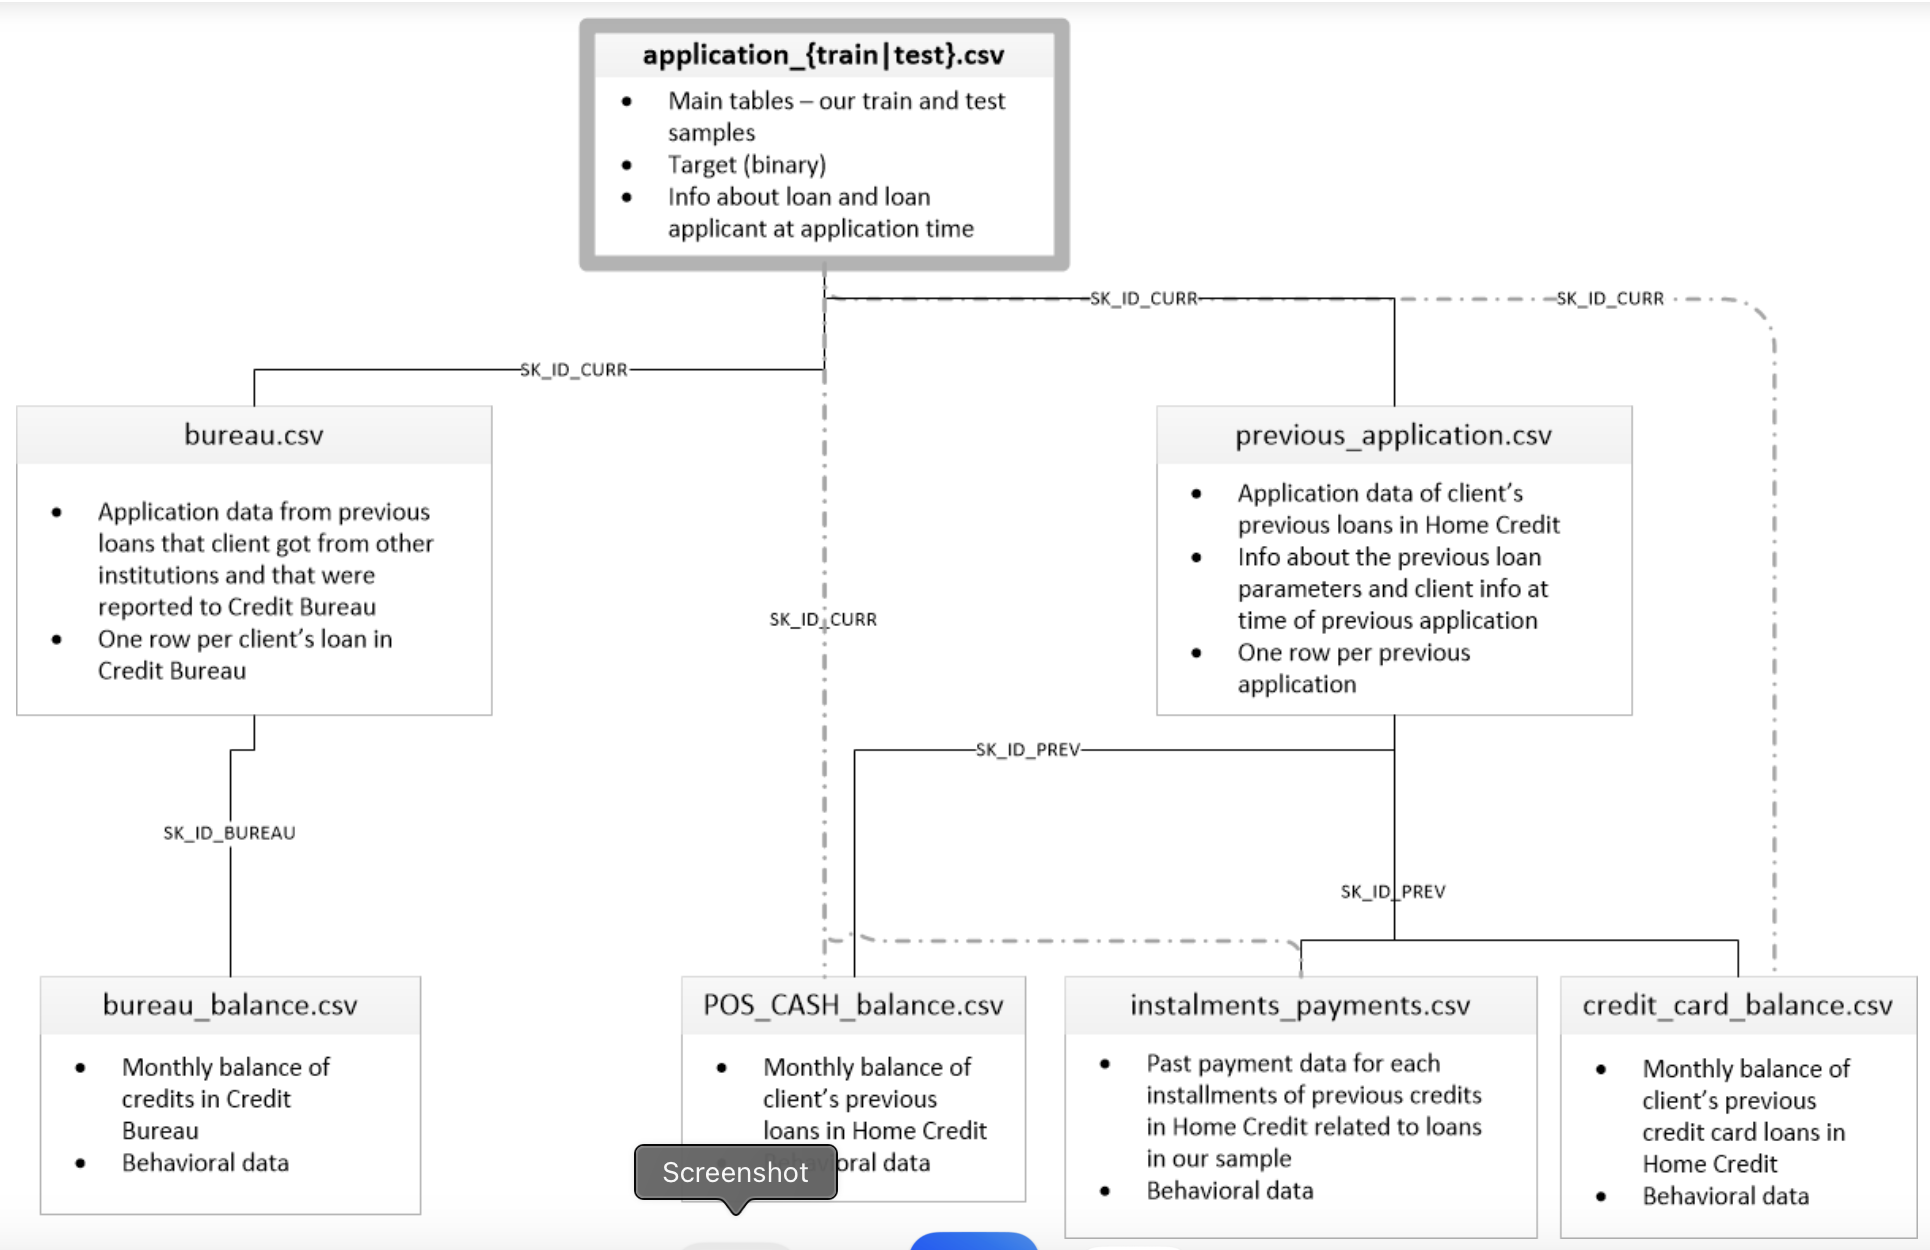

## Pipelines
XGBoost Pipeline:

Utilizes XGBoost, a powerful gradient boosting model, with logloss as the primary evaluation metric. It is efficient in handling complex relationships in the data and performs well on large datasets.

SGD Classifier Pipeline:

Utilizes SGDClassifier with logistic loss and L2 regularization for performance and scalability on large datasets to prevent overfitting.

Logistic Regression with Lasso (L1) Pipeline:

Utilizes Lasso (L1) regularization for feature selection, reducing the model's complexity by pushing irrelevant feature coefficients to zero.

Logistic Regression with Ridge (L2) Pipeline:

Uses Ridge (L2) regularization to prevent overfitting by shrinking large coefficients without eliminating any features from the model.

Random Forest Pipeline:

Employs Random Forest, an ensemble method that builds numerous decision trees for strength, handling non-linear relationships and making a stable model.

## Experimental results
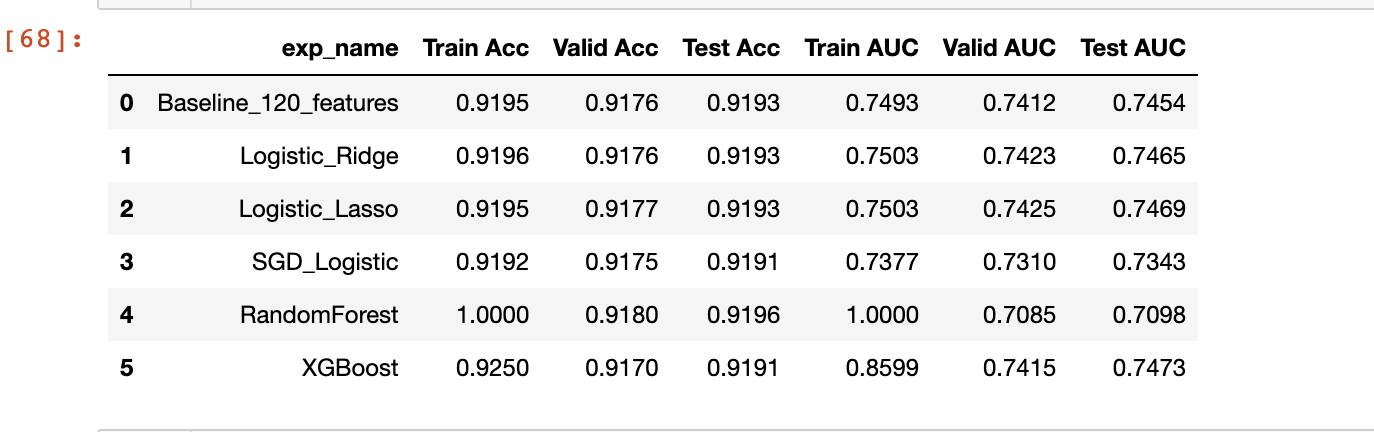 


## Discussion
### **Experimental Result Discussion and Analysis**

In our experiment, we tested five machine learning models: **XGBoost**, **SGDClassifier**, **Logistic Regression with Lasso (L1)**, **Logistic Regression with Ridge (L2)**, and **Random Forest**. We wanted to know top metrics such as **train accuracy**, **validation accuracy**, **test accuracy**, **train AUC**, **validation AUC**, and **test AUC** to select the best-performing model in predicting loan repayment for the Home Credit Default Risk (HCDR) dataset.

1. **XGBoost**:
- **Performance**: XGBoost was good with a **train accuracy** of 92.50% and a **test accuracy** of 91.91%, and it showed consistent performance on training and unseen data. The **train AUC** of 0.8599 and **test AUC** of 0.7473 show a good ability to distinguish between the classes, and it avoided severe overfitting, which is common in more complicated models.
- **Strengths**: Its ability to detect subtle relationships within the data and its robustness make it a good choice for this use, especially for handling large, structured data. 

2. **SGDClassifier**:
- **Performance**: The **SGDClassifier** was 91.92% accurate in **train accuracy** and 91.75% in **test accuracy**. However, its **test AUC** (0.7343) was lower compared to other models. This indicates that the model performs well in accuracy but is not able to discriminate between the classes like other models.
- **Strengths**: SGD is efficient for large datasets, and its ability to handle online learning and incremental updates can be beneficial for certain applications, though it may not be the best for capturing complex patterns in this particular dataset.

3. **Logistic Regression with Lasso (L1)**:
- **Performance**: **Logistic Regression with Lasso (L1)** performed similarly to **Logistic Regression with Ridge** with a **train accuracy** of 91.96% and **test accuracy** of 91.93%. The **test AUC** of 0.7469 was slightly better than Ridge and suggests that Lasso's feature selection capability enhanced the model's generalization to new data.
- **Strengths**: Lasso regularization helps to simplify the model by driving coefficients of irrelevant features to zero, which can be particularly useful when dealing with high-dimensional datasets.

4. **Logistic Regression with Ridge (L2)**:
- **Performance**: The **Ridge (L2) Logistic Regression** obtained a **train accuracy** of 91.96% and **test accuracy** of 91.93%, with the **test AUC** standing at 0.7465. The model performed well at preventing overfitting by shrinkage of coefficients but could not surpass the performance of the Lasso model.
- **Advantages**: Ridge regularization can come in handy if one is working with correlated features since it prevents coefficients from becoming very large, thus stabilizing the model and the generalization being improved.
5. **Random Forest:**
- **Performance**: The **Random Forest** model was 1.000 for **train accuracy**, which means overfitting because the **test accuracy** dropped to 91.96%. The **train AUC** of 1.000 also means that the model fit the training data perfectly, but the **test AUC** of 0.7098 means that it did not generalize well on new data.
- **Strengths**: Random Forest is robust and resilient and can handle linear and non-linear relationships. But here, the model has apparently learned too much from the training data and hence overfitted.

### **Conclusion**:
- **XGBoost** performed best, with a good **accuracy** and **AUC** on both train and test sets. It generalized very well in unseen data and picked up on the complex relationships in the data well.
- **Logistic Regression with Lasso (L1)** and **Ridge (L2)** models also performed well, where Lasso performed marginally better in **test AUC**.
- **SGDClassifier**, though efficient for large data, was less efficient in distinguishing the classes since its lower **AUC** can be seen.
- **Random Forest**, though promising initially with high **train accuracy**, overfitted, hence being less appropriate for generalization here.

Based on these results, **XGBoost** is recommended for this project since it was the only one that generalized well across all the metrics used for evaluation.

## Kaggle Submission

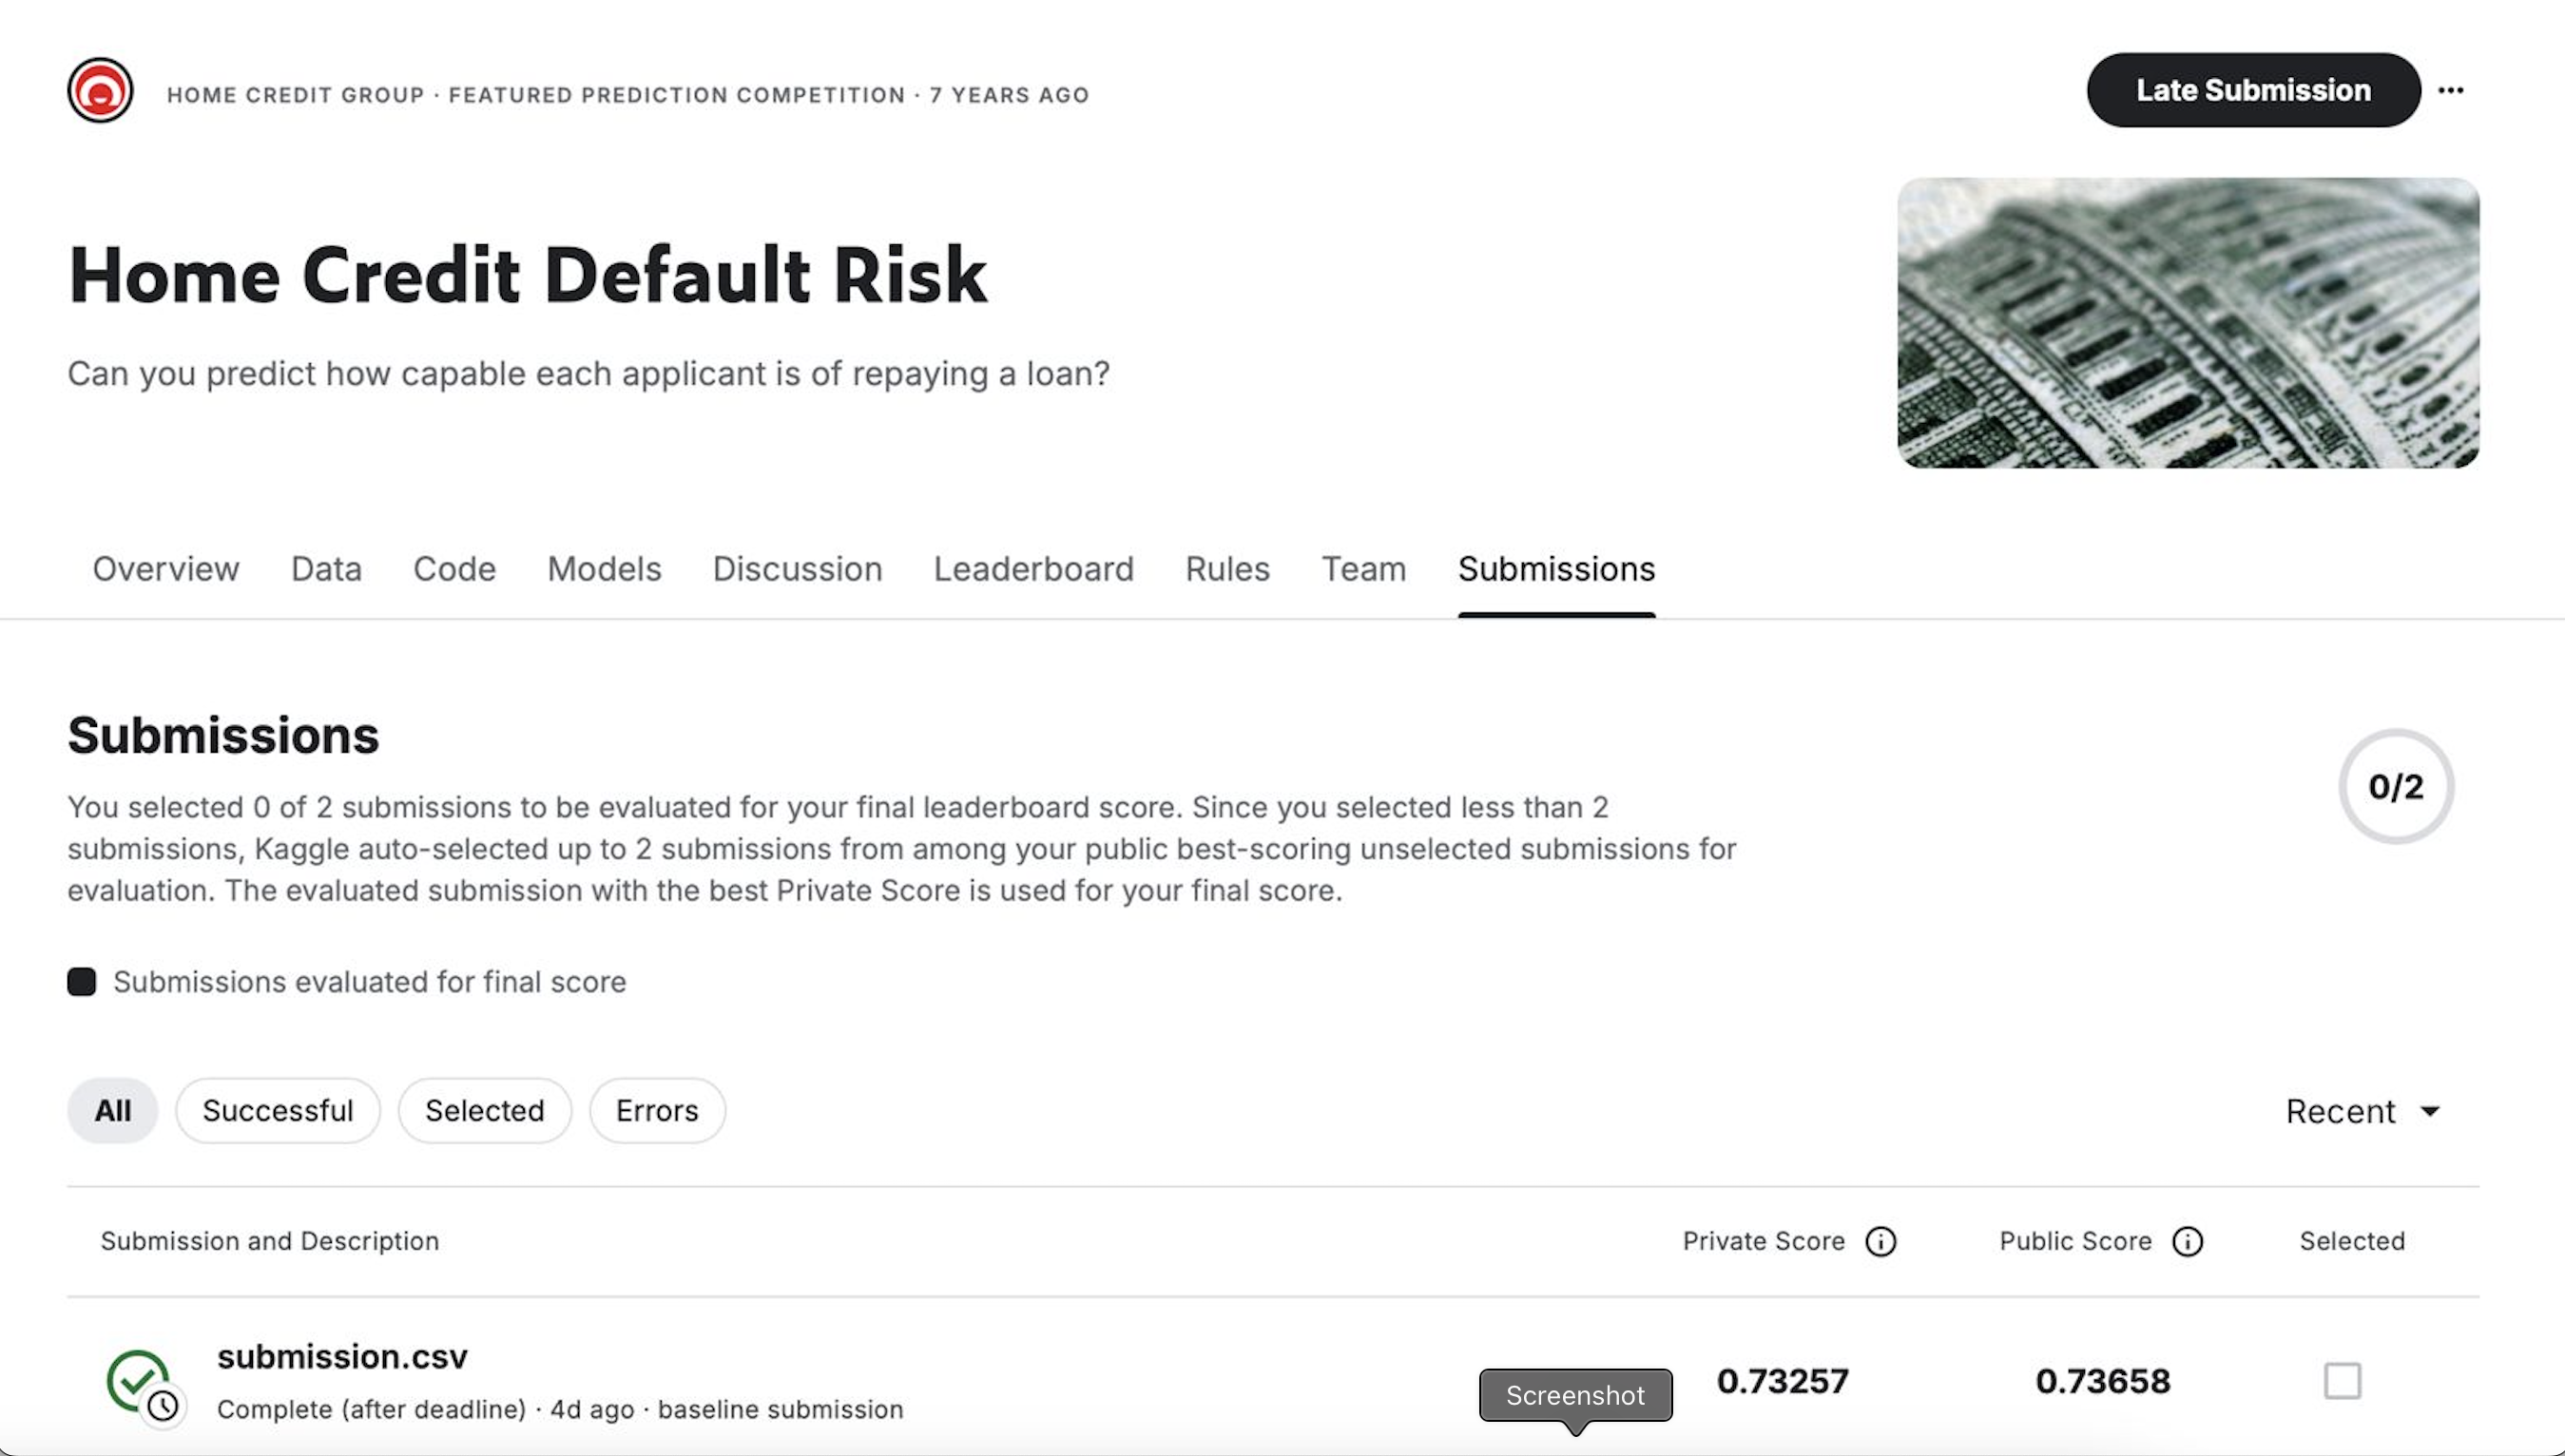

# References

- Banasik, J., Crook, J., & Thomas, L. (2003). Credit Scoring with Macroeconomic Variables. Journal of the Operational Research Society, 54(3), 249-257.

- Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785-794). ACM.

- Guyon, I., & Elisseeff, A. (2003). An Introduction to Variable and Feature Selection. Journal of Machine Learning Research, 3, 1157-1182.


#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

# Team

- Prajwal Venugopal
- Rithvik Mysore Suresh
- Vijay Sunkugari
- Venkata Gummadi


## Phase Leader Plan

| Phase   | Week   | Responsibilities                                                                                     | Phase Leader               |
|---------|--------|------------------------------------------------------------------------------------------------------|----------------------------|
| Phase 1 | Week 13| • Project proposal preparation<br>• Define project description<br>• Choose dataset<br>• Identify metrics<br>• Select baseline models<br>• Outline baseline and planned pipelines<br>• Submit phase leader and credit assignment tables | Prajwal Venugopal          |
| Phase 2 | Week 14| • Perform EDA<br>• Implement baseline pipeline<br>• Extract metrics from baseline models<br>• Feature engineering (initial)<br>• Hyperparameter tuning (initial)<br>• Submit brief report, video update, and slides on Canvas | Rithvik Mysore Suresh      |
| Phase 3 | Week 15| • Second round of feature engineering<br>• Further hyperparameter tuning<br>• Perform feature selection<br>• Explore ensemble methods<br>• Submit video update, notebook, and slides on Canvas | Vijay Sunkugari            |
| Phase 4 | Week 16| • Implement neural network models<br>• Experiment with advanced architectures and loss functions<br>• Finalize project report<br>• Submit final notebook, video, and slides on Canvas | Venkata Gummadi            |


## Credit Assignment Plan – Phases 1 to 4

| Task                                                                                          | SMART Goal                                                                                                                                       | Estimated Effort (hrs) | Assigned To             | Phase   |
|-----------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|------------------------|--------------------------|---------|
| Define project title and description                                                          | Clearly define the project title and write a 150-word abstract using the STAR method to communicate the objective and scope                      | 2                      | Rithvik Mysore Suresh        | Phase 1 |
| Dataset selection and understanding                                                           | Review both datasets (HCDR and CaDoD), and document the structure, relevance, and reasoning for choosing one                                     | 3                      | Prajwal Venugopal    | Phase 1 |
| Define baseline metrics                                                                        | Identify and justify baseline metrics such as accuracy, precision, recall, F1-score, AUC, and domain-specific metrics                            | 2                      | Venkata Gummadi          | Phase 1 |
| Propose baseline and planned ML models                                                         | Choose suitable baseline models (e.g., logistic regression, decision trees) and document planned advanced models for later phases                | 2                      | Vijay Sunkugari          | Phase 1 |
| Design baseline pipeline                                                                       | Create a basic ML pipeline structure with preprocessing and baseline model training using sklearn                                                | 3                      | Vijay Sunkugari          | Phase 1 |
| Draft SMART goals for Phase 1                                                                  | Write clearly defined SMART goals aligned with submission requirements                                                                           | 1                      | Prajwal Venugopal        | Phase 1 |
| Define joins between datasets                                                                  | Identify key relationships between tables (e.g., using SK_ID_CURR, SK_ID_PREV) and document join strategies                                      | 2                      | Rithvik Mysore Suresh    | Phase 1 |
| Create phase leader plan table                                                                 | Document project timeline and assign project manager for each phase using a clean table format                                                   | 1                      | Prajwal Venugopal        | Phase 1 |
| Create credit assignment plan table                                                            | Prepare this table (SMART goals, time estimation, roles) for inclusion at the top of the notebook                                                | 1                      | Rithvik Mysore Suresh        | Phase 1 |
| Submit Jupyter Notebook in `.ipynb` and `.html` formats with all required content              | Ensure the notebook is exported and submitted in both formats, verifying link/image visibility in incognito mode                                | 1                      | TEAM      | Phase 1 |
| Load and preprocess dataset                                                                    | Download, clean, and preprocess HCDR data; handle missing values and standardize features                                                        | 3                      | Venkata Gummadi          | Phase 2 |
| Perform EDA                                                                                   | Explore and visualize key features, correlations, distributions, and identify potential outliers or data issues                                 | 3                      | Rithvik Mysore Suresh    | Phase 2 |
| Implement baseline pipeline                                                                    | Code and run baseline model pipeline end-to-end (train/test split, preprocessing, model, evaluation)                                            | 4                      | Vijay Sunkugari          | Phase 2 |
| Conduct initial feature engineering                                                            | Engineer new features (e.g., ratios, aggregations) and test their impact on model performance                                                    | 3                      | Rithvik Mysore Suresh    | Phase 2 |
| Perform initial hyperparameter tuning                                                          | Use grid/random search to optimize parameters for baseline model                                                                                 | 3                      | Prajwal Venugopal          | Phase 2 |
| Prepare Phase 2 video presentation and slides                                                  | Record a 2-minute video summary and slides explaining EDA, baseline results, and feature plans                                                   | 2                      | TEAM      | Phase 2 |
| Second round of feature engineering                                                            | Develop new meaningful features from auxiliary tables (e.g., bureau, previous_application)                                                       | 3                      | Rithvik Mysore Suresh    | Phase 3 |
| Hyperparameter tuning (advanced)                                                               | Use Bayesian/advanced search methods to tune models like Random Forest, XGBoost, etc.                                                            | 3                      | Venkata Gummadi          | Phase 3 |
| Perform feature selection                                                                       | Apply methods like mutual info, SHAP, or recursive elimination to reduce feature space                                                           | 3                      | Vijay Sunkugari          | Phase 3 |
| Explore ensemble methods                                                                        | Combine multiple models (e.g., voting, stacking) and evaluate performance                                                                        | 3                      | Prajwal Venugopal        | Phase 3 |
| Prepare Phase 3 video update and slides                                                        | Record a 2-minute video and create slides summarizing tuning, ensembles, and performance improvements                                            | 2                      | TEAM      | Phase 3 |
| Design and implement neural network                                                            | Build and train a feedforward neural network or deep model using PyTorch or TensorFlow                                                           | 4                      | Vijay Sunkugari          | Phase 4 |
| Experiment with advanced architectures                                                         | Try different hidden layers, activations, optimizers, and custom loss functions                                                                  | 3                      | Venkata Gummadi          | Phase 4 |
| Final model evaluation and comparison                                                          | Compare performance of neural network vs ensemble/baseline models using all metrics                                                              | 2                      | Prajwal Venugopal        | Phase 4 |
| Write final project report                                                                      | Summarize problem, data, methods, results, and conclusions in a detailed report                                                                  | 3                      | TEAM        | Phase 4 |
| Submit final video presentation, slides, and notebook                                          | Prepare and upload final 2-minute demo, slides, and cleaned notebook to Canvas Discussion                                                        | 2                      | TEAM      | Phase 4 |
